In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
# print every command of cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# I Data Importing & Cleansing

## 1.Importing orders data

In [3]:
#Import Orders File
orders=pd.read_csv("ConsumerElectronics.csv",low_memory=False)
orders.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
#info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [5]:
#Removing Duplicates
orders=orders.drop_duplicates(subset=None,keep='first',inplace=False)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
fsn_id                             1543981 non-null object
order_date                         1543981 non-null object
Year                               1543981 non-null int64
Month                              1543981 non-null int64
order_id                           1543981 non-null float64
order_item_id                      1543981 non-null float64
gmv                                1543981 non-null object
units                              1543981 non-null int64
deliverybdays                      1543981 non-null object
deliverycdays                      1543981 non-null object
s1_fact.order_payment_type         1543981 non-null object
sla                                1543981 non-null int64
cust_id                            1543981 non-null object
pincode                            1543981 non-null object
product_analytic_super_category    1543981 non-null object
prod

In [6]:
orders['gmv'].head(10)
#Leading white spaces there

0    6400
1    6900
2    1990
3    1690
4    1618
5    3324
6    3695
7    3695
8        
9    3695
Name: gmv, dtype: object

In [7]:
#Leading White space removed
orders=orders[orders['gmv']!=' ']
orders['gmv'].head(10)

0     6400
1     6900
2     1990
3     1690
4     1618
5     3324
6     3695
7     3695
9     3695
10    3695
Name: gmv, dtype: object

In [8]:
# Converting to Date format
orders['order_date'] = orders['order_date'].astype(str)
orders['order_date'] = pd.to_datetime(orders['order_date'] , dayfirst=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539943 entries, 0 to 1543996
Data columns (total 20 columns):
fsn_id                             1539943 non-null object
order_date                         1539943 non-null datetime64[ns]
Year                               1539943 non-null int64
Month                              1539943 non-null int64
order_id                           1539943 non-null float64
order_item_id                      1539943 non-null float64
gmv                                1539943 non-null object
units                              1539943 non-null int64
deliverybdays                      1539943 non-null object
deliverycdays                      1539943 non-null object
s1_fact.order_payment_type         1539943 non-null object
sla                                1539943 non-null int64
cust_id                            1539943 non-null object
pincode                            1539943 non-null object
product_analytic_super_category    1539943 non-null obj

In [9]:
# steeting the start and end date for filtering
import datetime
start = datetime.datetime.strptime("01-07-2015", "%d-%m-%Y")
end = datetime.datetime.strptime("01-07-2016", "%d-%m-%Y")
orders=orders[(orders['order_date']>=start) & (orders['order_date']<end)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539334 entries, 0 to 1543996
Data columns (total 20 columns):
fsn_id                             1539334 non-null object
order_date                         1539334 non-null datetime64[ns]
Year                               1539334 non-null int64
Month                              1539334 non-null int64
order_id                           1539334 non-null float64
order_item_id                      1539334 non-null float64
gmv                                1539334 non-null object
units                              1539334 non-null int64
deliverybdays                      1539334 non-null object
deliverycdays                      1539334 non-null object
s1_fact.order_payment_type         1539334 non-null object
sla                                1539334 non-null int64
cust_id                            1539334 non-null object
pincode                            1539334 non-null object
product_analytic_super_category    1539334 non-null obj

In [10]:
#produc_mrp should not be Zero and units shoudnot be zero
orders=orders[orders['product_mrp']!=0]
orders=orders[orders['units']!=0]

In [11]:
#Converting mv from object to float
orders['gmv']=pd.to_numeric(orders['gmv'],errors='coerce')

In [12]:
# treating -ve values in 'product_procurement_sla' appropriately
def positive(x):
    if x<0:
        return 0
    else:
        return x
orders['product_procurement_sla'] = orders['product_procurement_sla'].apply(positive)

In [13]:
orders.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
count,"1,534,422.00","1,534,422.00","1,534,422.00","1,534,422.00","1,534,422.00","1,534,422.00","1,534,422.00","1,534,422.00","1,534,422.00"
mean,"2,015.56",6.41,"2,837,707,616,232,258.00","9,168,723,023,819,678.00","2,483.43",1.02,5.68,"4,179.07",5.41
std,0.50,3.69,"1,285,369,519,977,542.00","42,957,445,951,827,824.00","5,641.31",0.25,2.99,"8,617.89",53.05
min,"2,015.00",1.00,"76,331,515.00","108,016,495.00",0.00,1.00,0.00,49.00,0.00
25%,"2,015.00",3.00,"1,597,004,634,930,875.00","1,599,382,725,780,250.00",340.00,1.00,4.00,800.00,1.00
50%,"2,016.00",6.00,"2,610,046,025,077,600.00","2,612,857,753,352,550.00",755.00,1.00,6.00,"1,599.00",2.00
75%,"2,016.00",10.00,"3,615,669,024,499,650.00","3,641,368,631,907,250.00","1,999.00",1.00,7.00,"3,499.00",3.00
max,"2,016.00",12.00,"5,395,076,790,260,600.00","300,037,347,717,704,000.00","226,947.00",50.00,"1,006.00","299,999.00","1,000.00"


{'whiskers': [<matplotlib.lines.Line2D at 0x1a9d328d978>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9d328dda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9d328d550>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9d32a26d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9d32a2a20>],
 'means': []}

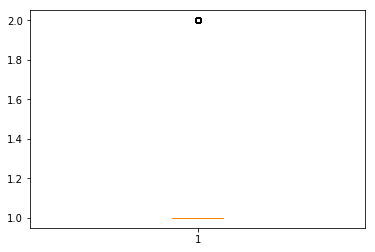

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9d331b860>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9d331bef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9d331b470>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9d33255c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9d3325908>],
 'means': []}

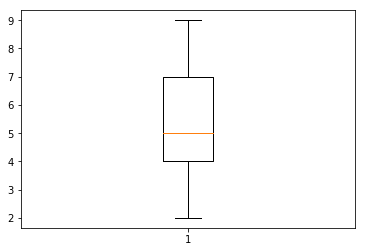

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9d3379da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9d3386470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9d33799b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9d3386b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9d3386e48>],
 'means': []}

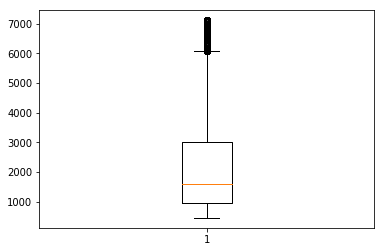

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9d33dbd68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9d33e46d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9d33dbc18>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9d33e4d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9d33e4e48>],
 'means': []}

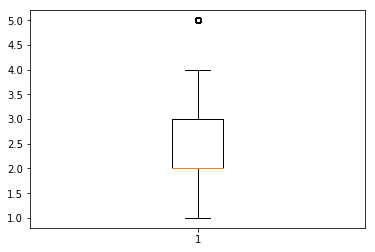

In [14]:
#Outlier Treatment for Units,sla, product_mrp,Product_procurement_sla
Q1 = orders['units'].quantile(0.01)
Q3 = orders['units'].quantile(0.99)
#IQR = Q3-Q1
orders = orders[(orders['units'] >= Q1) & (orders['units'] <= Q3)]
plt.boxplot(orders['units'])
plt.show()

Q1 = orders['sla'].quantile(0.10)
Q3 = orders['sla'].quantile(0.90)
#IQR = Q3-Q1
orders = orders[(orders['sla'] >= Q1) & (orders['sla'] <= Q3)]
plt.boxplot(orders['sla'])
plt.show()


Q1 = orders['product_mrp'].quantile(0.10)
Q3 = orders['product_mrp'].quantile(0.90)
#IQR = Q3-Q1
orders = orders[(orders['product_mrp'] >= Q1) & (orders['product_mrp'] <= Q3)]
plt.boxplot(orders['product_mrp'])
plt.show()

Q1 = orders['product_procurement_sla'].quantile(0.10)
Q3 = orders['product_procurement_sla'].quantile(0.90)
#IQR = Q3-Q1
orders = orders[(orders['product_procurement_sla'] >= Q1) & (orders['product_procurement_sla'] <= Q3)]
plt.boxplot(orders['product_procurement_sla'])
plt.show()


In [15]:
orders.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
count,"1,000,583.00","1,000,583.00","1,000,583.00","1,000,583.00","1,000,583.00","1,000,583.00","1,000,583.00","1,000,583.00","1,000,583.00"
mean,"2,015.58",6.31,"2,864,523,417,651,919.00","9,742,637,413,129,478.00","1,106.06",1.01,5.56,"2,046.54",2.58
std,0.49,3.65,"1,264,118,555,723,258.50","44,725,968,767,529,800.00","1,033.29",0.10,1.96,"1,516.88",1.31
min,"2,015.00",1.00,"93,783,943.00","207,200,079.00",0.00,1.00,2.00,450.00,1.00
25%,"2,015.00",3.00,"1,604,914,978,369,550.00","1,607,546,163,599,350.00",370.00,1.00,4.00,950.00,2.00
50%,"2,016.00",6.00,"2,614,294,372,401,000.00","2,619,775,703,262,000.00",699.00,1.00,6.00,"1,500.00",2.00
75%,"2,016.00",10.00,"3,618,886,065,852,000.00","4,393,553,661,573,200.00","1,499.00",1.00,7.00,"2,990.00",3.00
max,"2,016.00",12.00,"5,395,076,790,260,600.00","300,037,347,717,704,000.00","20,099.00",2.00,9.00,"7,120.00",5.00


## 2.Importing Media Investment Data

In [16]:
#Import Media_Investments Data
media_investment= pd.read_excel('Media data and other information.xlsx', sheetname=1, index_col=0,header=2)
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
nan,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
nan,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
nan,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
nan,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
nan,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan


In [17]:
# Re-Arranging Columns to represent C
media_investment=media_investment.reset_index()
media_investment=media_investment.drop(['index'], axis=1)
media_investment=media_investment.fillna(0)
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00


In [18]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


In [19]:
#Converting Amount into Crores
media_investment[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']]=media_investment[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']].multiply(10000000, axis=1)

In [20]:
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00
1,2015,8,"50,643,060.89","64,380.73","12,780,736.84","10,633,317.58",63.25,"1,292,442.64","736,839.80","25,135,280.04",0.00,0.00
2,2015,9,"962,543,798.65","38,795,036.17","13,565,275.98","627,876,513.14","6,102,920.82","163,799,899.93","50,382,662.16","62,021,490.45",0.00,0.00
3,2015,10,"1,701,562,973.68","61,447,110.95","126,224,797.66","846,725,315.26","34,440,747.57","243,717,777.37","69,737,111.08","319,270,113.79",0.00,0.00
4,2015,11,"512,162,204.16","42,206,297.40","12,754,689.92","141,721,159.18","1,686,331.89","195,615,743.50","65,957,665.56","52,220,316.71",0.00,0.00


## 3. Importing NPS and Stock Index

In [21]:
#Import nps_stock Data
nps_stock= pd.read_excel('Media data and other information.xlsx', sheetname=3, index_col=0,header=0)
nps_stock.head()

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
Stock Index,"1,177.00","1,206.00","1,101.00","1,210.00","1,233.00","1,038.00","1,052.00","1,222.00","1,015.00","1,242.00","1,228.00","1,194.00"


In [22]:
#Re-Arranging Data 
nps_stock=nps_stock.transpose().reset_index()
nps_stock=nps_stock.rename(columns={'index':'Year&Month'})
nps_stock

,Year&Month,NPS,Stock Index
0,July'15,54.60,"1,177.00"
1,Aug'15,59.99,"1,206.00"
2,Sept'15,46.93,"1,101.00"
3,Oct'15,44.40,"1,210.00"
4,Nov'15,47.00,"1,233.00"
5,Dec'15,45.80,"1,038.00"
6,Jan'16,47.09,"1,052.00"
7,Feb'16,50.33,"1,222.00"
8,Mar'16,49.02,"1,015.00"
9,Apr'16,51.83,"1,242.00"


In [23]:
#Splitting Year & Month to two Different Columns
month =pd.DataFrame({"July'15" : [7,'2015'],"Aug'15" : [8,'2015'],"Sept'15" : [9,'2015'],"Oct'15" : [10,'2015'],"Nov'15":[11,'2015'],"Dec'15":[12,'2015'],"Jan'16" :[1,'2016'],"Feb'16":[2,'2016'],"Mar'16":[3,'2016'],"Apr'16":[4,'2016'],"May'16":[5,'2016'],"June'16":[6,'2016']})
month=month.transpose()
month=month.reset_index()
month=month.rename(columns={'index':'Year&Month',0:'Month',1:'Year'})

In [24]:
#mergeing the data set to make the nps_stock data set
nps_stock=pd.merge(month,nps_stock,on='Year&Month',how='inner')
nps_stock=nps_stock.drop('Year&Month',axis=1)
nps_stock

,Month,Year,NPS,Stock Index
0,7,2015,54.60,"1,177.00"
1,8,2015,59.99,"1,206.00"
2,9,2015,46.93,"1,101.00"
3,10,2015,44.40,"1,210.00"
4,11,2015,47.00,"1,233.00"
5,12,2015,45.80,"1,038.00"
6,1,2016,47.09,"1,052.00"
7,2,2016,50.33,"1,222.00"
8,3,2016,49.02,"1,015.00"
9,4,2016,51.83,"1,242.00"


## 4. Product List Data

In [25]:
#Productlist Data imported
product_list=pd.read_excel('Media data and other information.xlsx', sheetname=0, index_col=0,header=0)
product_list.head()

,Unnamed: 1,Frequency,Percent
nan,\N,5828,0.35
nan,AmplifierReceiver,4056,0.25
nan,AudioMP3Player,112892,6.85
nan,Binoculars,14599,0.89
nan,BoomBox,2879,0.17


In [26]:
#Renmaing the column
product_list=product_list.rename(columns={'Unnamed: 1':'product_analytic_vertical'})
product_list.head()

,product_analytic_vertical,Frequency,Percent
nan,\N,5828,0.35
nan,AmplifierReceiver,4056,0.25
nan,AudioMP3Player,112892,6.85
nan,Binoculars,14599,0.89
nan,BoomBox,2879,0.17


## 5 Special Sale Calendar Import

In [27]:
#Special Sales Dates have been imported
special_sale_calendar=pd.read_excel('Media data and other information.xlsx', sheetname=2, index_col=0,header=0)
special_sale_calendar=special_sale_calendar.reset_index()
special_sale_calendar=special_sale_calendar.drop(['index'], axis=1)
special_sale_calendar=special_sale_calendar.rename(columns={'Unnamed: 1':'Year'})
special_sale_calendar

,Year,Sales Calendar
0,"2,015.00",(18-19th July)
1,nan,(15-17th Aug)
2,nan,(28-30th Aug)
3,nan,(17-15th Oct)
4,nan,(7-14th Nov)
5,nan,(25th Dec'15 - 3rd Jan'16)
6,"2,016.00",(20-22 Jan)
7,nan,(1-2 Feb)
8,nan,(20-21 Feb)
9,nan,(14-15 Feb)


In [28]:
#Series created based on the dates mentioned above
specialsale=pd.Series(["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-09-17","2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14","2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25","2016-05-26","2016-05-27"])
#Dataframe created from the above Series
special_sale_calendar=pd.DataFrame(specialsale)
special_sale_calendar.info()
#Converting Special Sale Date converted from object to Date Format
special_sale_calendar=special_sale_calendar.rename(columns={0:'Special_Sale_Date'})
special_sale_calendar['Special_Sale_Date'] = special_sale_calendar['Special_Sale_Date'].astype(str)
special_sale_calendar['Special_Sale_Date']  = special_sale_calendar['Special_Sale_Date'] .str.replace("/", "-")
special_sale_calendar['Special_Sale_Date']  = pd.to_datetime(special_sale_calendar['Special_Sale_Date'] , dayfirst=True)
special_sale_calendar['Special_Sale_Date'] =special_sale_calendar['Special_Sale_Date'].dt.date
special_sale_calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 1 columns):
0    44 non-null object
dtypes: object(1)
memory usage: 432.0+ bytes


,Special_Sale_Date
0,2015-07-18
1,2015-07-19
2,2015-08-15
3,2015-08-16
4,2015-09-17


## 6.Holidays Data

In [29]:
# Importing Holidays for Canada ontario State for 2015-2016 Years
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
Holiday_flag    21 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.0 bytes


# II Feature Engineering

## 1.Creating New Features 

In [30]:
#Creating Week from order Date
orders['Week']=orders['order_date'].dt.week
orders['order_date']=orders['order_date'].dt.date
orders.head()


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,\N,\N,...,5,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,\N,\N,...,6,-7.15614041481066E+016,6.40491320207757E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42
7,ACCCX3S5JGAJETYR,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,\N,\N,...,5,9.17327596234152E+018,-1.60630305201981E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42


In [31]:
orders.Week.unique()

array([42, 43, 41, 44, 40, 45, 10,  8, 17, 39,  7, 47, 14,  4, 11,  6,  2,
       13,  3, 46,  9,  1,  5, 16, 48, 12, 38, 49, 53, 50, 51, 52, 23, 15,
       21, 18, 19, 20, 22, 24, 25, 26, 29, 30, 28, 31, 27, 33, 32, 37, 34,
       36, 35], dtype=int64)

In [32]:
# Changing week Nrs> 53
def week(x):
    if x >=1 and x<=26:
        return x+53
    else:
        return x
orders['Week']=orders['Week'].apply(week)

In [33]:
# checking the unique weeks
orders.Week.unique()

array([42, 43, 41, 44, 40, 45, 63, 61, 70, 39, 60, 47, 67, 57, 64, 59, 55,
       66, 56, 46, 62, 54, 58, 69, 48, 65, 38, 49, 53, 50, 51, 52, 76, 68,
       74, 71, 72, 73, 75, 77, 78, 79, 29, 30, 28, 31, 27, 33, 32, 37, 34,
       36, 35], dtype=int64)

Week Numbers have been reanged from 26 to 79 Weeks

In [34]:
# Creating list_price 
orders['list_price']=orders['gmv']/orders['units']
orders.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week,list_price
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,"1,690.00"
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,"1,618.00"
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,\N,\N,...,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,"3,324.00"
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,\N,\N,...,-7.15614041481066E+016,6.40491320207757E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,"3,695.00"
7,ACCCX3S5JGAJETYR,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,\N,\N,...,9.17327596234152E+018,-1.60630305201981E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,"3,695.00"


In [35]:
#Removing records having product_mrp greater than list_price
orders=orders[orders['product_mrp']>=orders['list_price']]

In [36]:
orders['discount']=orders['product_mrp']-orders['list_price']

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9d32b14a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9d32b1278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9d32b1828>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9d3636c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9d3e33668>],
 'means': []}

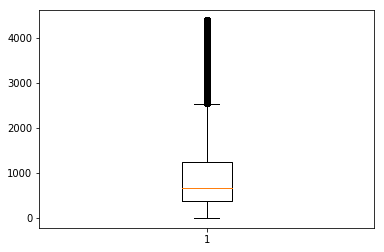

In [37]:
#Outlier Treatment for discount
Q1 = orders['discount'].quantile(0.01)
Q3 = orders['discount'].quantile(0.99)
#IQR = Q3-Q1
orders = orders[(orders['discount'] >= Q1) & (orders['discount'] <= Q3)]
plt.boxplot(orders['discount'])
plt.show()

In [38]:
orders.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,Week,list_price,discount
count,"977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00","977,583.00"
mean,"2,015.58",6.31,"2,864,126,713,155,423.00","9,742,530,014,780,734.00","1,095.30",1.01,5.56,"2,013.54",2.57,56.22,"1,086.72",926.82
std,0.49,3.65,"1,264,257,567,671,387.25","44,726,896,523,433,384.00","1,029.72",0.10,1.96,"1,459.99",1.31,13.48,"1,017.51",797.31
min,"2,015.00",1.00,"93,783,943.00","207,200,079.00",0.00,1.00,2.00,450.00,1.00,27.00,0.00,0.00
25%,"2,015.00",3.00,"1,604,827,980,906,050.00","1,607,509,471,282,750.00",365.00,1.00,4.00,950.00,2.00,44.00,359.00,374.00
50%,"2,016.00",6.00,"2,613,980,331,310,700.00","2,619,701,109,996,100.00",699.00,1.00,6.00,"1,500.00",2.00,57.00,699.00,664.00
75%,"2,016.00",10.00,"3,618,831,266,303,000.00","4,393,450,188,494,750.00","1,499.00",1.00,7.00,"2,990.00",3.00,68.00,"1,499.00","1,241.00"
max,"2,016.00",12.00,"5,395,076,790,260,600.00","300,037,347,717,704,000.00","12,580.00",2.00,9.00,"7,120.00",5.00,79.00,"7,100.00","4,391.00"


In [39]:
#Creating Pay Date Flag
#Creating Pay Data flag if day is 01 or 15
orders['pay_date_flag'] = orders['order_date'].astype(str)
orders['pay_date_flag'] = orders['pay_date_flag'].str.replace("/", "-")
orders['pay_date_flag'] = pd.to_datetime(orders['pay_date_flag'], dayfirst=True)
orders['pay_date_flag']=orders['pay_date_flag'].dt.day
orders.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week,list_price,discount,pay_date_flag
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,"1,690.00",409.00,14
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,"1,618.00",481.00,17
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,"3,324.00",720.00,17
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,"3,695.00",349.00,16
7,ACCCX3S5JGAJETYR,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,"3,695.00",349.00,15


In [40]:
# If order Date is equals to Pay Date then 1 else Zero
#udf to create pay Date flag
def pay_date_flag(x):
    if x == 1 or x==15:
        return 1
    else:
        return 0
orders['pay_date_flag']=orders['pay_date_flag'].apply(pay_date_flag)

In [41]:
pd.DataFrame(orders.groupby('pay_date_flag')['order_id'].nunique())

,order_id
pay_date_flag,
0,895102
1,62114


In [42]:
pd.DataFrame(orders.groupby('pay_date_flag')['list_price'].sum())

,list_price
pay_date_flag,
0,"994,386,318.41"
1,"67,968,092.63"


In [43]:
#Creating Holiday Flag
#If it is holiday then 1 else Zero
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date
orders=pd.merge(orders,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [44]:
#udf for week Nr Change
def holiday_flag(x):
    if x == 0:
        return 0
    else:
        return 1
orders['Holiday_flag']=orders['Holiday_flag'].apply(holiday_flag)

In [45]:
pd.DataFrame(orders.groupby('Holiday_flag')['order_id'].nunique())

,order_id
Holiday_flag,
0,935971
1,20872


In [46]:
pd.DataFrame(orders.groupby('Holiday_flag')['list_price'].sum())

,list_price
Holiday_flag,
0,"1,038,961,173.53"
1,"23,393,237.50"


In [47]:
# Creating Special_sales_Date Flag
orders=pd.merge(orders,special_sale_calendar,left_on='order_date',right_on='Special_Sale_Date',how='left').fillna(0)
# Holiday Flag applied
orders['Special_Sale_Date']=orders['Special_Sale_Date'].apply(holiday_flag)

In [48]:
pd.DataFrame(orders.groupby('Special_Sale_Date')['order_id'].nunique())

,order_id
Special_Sale_Date,
0,782808
1,174380


In [49]:
pd.DataFrame(orders.groupby('Special_Sale_Date')['list_price'].sum())

,list_price
Special_Sale_Date,
0,"865,284,570.33"
1,"197,069,840.71"


In [50]:
orders.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week,list_price,discount,pay_date_flag,Holiday_flag,Special_Sale_Date
0,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraTripod,2099,3,42,"1,690.00",409.00,0,0,0
1,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraTripod,2099,3,42,"1,618.00",481.00,0,0,1
2,ACCCX3S5JGAJETYR,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,\N,\N,...,CameraAccessory,CameraTripod,4044,5,42,"3,324.00",720.00,0,0,1
3,ACCCX3S5JGAJETYR,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,\N,\N,...,CameraAccessory,CameraTripod,4044,5,42,"3,695.00",349.00,0,0,1
4,ACCCX3S5JGAJETYR,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,\N,\N,...,CameraAccessory,CameraTripod,4044,5,42,"3,695.00",349.00,1,0,1


## 2.Converting all datasets into Weekly Level & Creation of Separate datasets

In [51]:
# Filtering Data Frames with required product_analytical Category
orders_camaccess=orders[orders['product_analytic_sub_category']=='CameraAccessory']
orders_gameaccess=orders[orders['product_analytic_sub_category']=='GamingAccessory']
orders_homeaudio=orders[orders['product_analytic_sub_category']=='HomeAudio']

In [52]:
# Creating Data frames summarizing in Weekly Level
week_orders_camaccess=pd.DataFrame(orders_camaccess.groupby('Week')['gmv','list_price','units','product_mrp','discount'].sum())
week_orders_homeaudio=pd.DataFrame(orders_homeaudio.groupby('Week')['gmv','list_price','units','product_mrp','discount'].sum())
week_orders_gameaccess=pd.DataFrame(orders_gameaccess.groupby('Week')['gmv','list_price','units','product_mrp','discount'].sum())

In [53]:
# Creating Data frames summarizing in Weekly Level
Week_sla_avg_camaccess=pd.DataFrame(orders_camaccess.groupby('Week')['sla','product_procurement_sla'].mean())
Week_sla_avg_homeaudio=pd.DataFrame(orders_homeaudio.groupby('Week')['sla','product_procurement_sla'].mean())
Week_sla_avg_gameaccess=pd.DataFrame(orders_gameaccess.groupby('Week')['sla','product_procurement_sla'].mean())

In [54]:
# Creating Data frames summarizing in Weekly Level
week_orders_camaccess=pd.merge(week_orders_camaccess,Week_sla_avg_camaccess,how='inner',on='Week')
week_orders_homeaudio=pd.merge(week_orders_homeaudio,Week_sla_avg_camaccess,how='inner',on='Week')
week_orders_gameaccess=pd.merge(week_orders_gameaccess,Week_sla_avg_camaccess,how='inner',on='Week')

In [55]:
# Creating Data frames summarizing in Weekly Level
week_orders_camaccess['% discount wrt list price']=week_orders_camaccess['discount']/week_orders_camaccess['list_price']
week_orders_homeaudio['% discount wrt list price']=week_orders_homeaudio['discount']/week_orders_homeaudio['list_price']
week_orders_gameaccess['% discount wrt list price']=week_orders_gameaccess['discount']/week_orders_gameaccess['list_price']

In [56]:
week_orders_camaccess.head()

,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price
Week,,,,,,,,
27,"1,544.00","1,544.00",2,2950,"1,406.00",4.50,3.00,0.91
28,"1,237,541.00","1,224,345.00",1496,2289918,"1,065,573.00",5.83,2.53,0.87
29,"1,519,243.00","1,500,508.00",1794,2879899,"1,379,391.00",5.75,2.58,0.92
30,"1,479,823.00","1,462,246.00",1850,2890694,"1,428,448.00",5.83,2.64,0.98
31,"978,782.00","965,706.00",1198,1867771,"902,065.00",5.92,2.61,0.93


In [57]:
week_orders_homeaudio.head()

,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price
Week,,,,,,,,
27,"23,853.00","23,853.00",12,36986,"13,133.00",4.50,3.00,0.55
28,"2,529,221.00","2,521,061.00",1263,3881172,"1,360,111.00",5.83,2.53,0.54
29,"3,014,018.00","2,997,096.00",1538,4762021,"1,764,925.00",5.75,2.58,0.59
30,"2,565,623.00","2,549,945.00",1379,4056581,"1,506,636.00",5.83,2.64,0.59
31,"1,954,770.00","1,939,004.00",1011,3105900,"1,166,896.00",5.92,2.61,0.60


In [58]:
week_orders_gameaccess.head()

,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price
Week,,,,,,,,
27,"5,546.00","5,546.00",6,8396,"2,850.00",4.50,3.00,0.51
28,"1,694,057.00","1,656,146.00",1714,2731232,"1,075,086.00",5.83,2.53,0.65
29,"1,483,796.00","1,461,141.00",1278,2375543,"914,402.00",5.75,2.58,0.63
30,"1,793,620.50","1,766,909.50",1503,3022712,"1,255,802.50",5.83,2.64,0.71
31,"1,186,521.00","1,156,103.00",1024,2206675,"1,050,572.00",5.92,2.61,0.91


In [59]:
# creating Time Series
date=pd.date_range(start='7/1/2015', end='6/30/2016', freq='D')
date=pd.DataFrame(date)
date=date.rename(columns={0:'date'})
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 1 columns):
date    366 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.9 KB


In [60]:
# extracting the  week, month , year from date
date['Week']=date['date'].dt.week
date['Year']=date['date'].dt.year
date['Month']=date['date'].dt.month
date['Week']=date['Week'].apply(week)

In [61]:
date['Week'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79], dtype=int64)

In [62]:
# group by week and date
Week_days=pd.DataFrame(date.groupby('Week')['date'].count())
Week_days.head()

,date
Week,
27,5
28,7
29,7
30,7
31,7


In [63]:
# group by week month, year
Month_NrWeeks=pd.DataFrame(date.groupby(['Week','Month','Year'])['date'].count()).reset_index()
Month_NrWeeks.head(6)

,Week,Month,Year,date
0,27,7,2015,5
1,28,7,2015,7
2,29,7,2015,7
3,30,7,2015,7
4,31,7,2015,5
5,31,8,2015,2


In [64]:
# group by year and month
Month_NrDays=pd.DataFrame(date.groupby(['Year','Month'])['date'].count())
Month_NrDays.head()

date
Year Month      
2015 7        31
     8        31
     9        30
     10       31
     11       30

In [65]:
media_investment=pd.merge(media_investment,Month_NrWeeks,how='inner',on='Month')
media_investment.head(6)

,Year_x,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Week,Year_y,date
0,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,27,2015,5
1,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,28,2015,7
2,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,29,2015,7
3,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,30,2015,7
4,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,31,2015,5
5,2015,8,"50,643,060.89","64,380.73","12,780,736.84","10,633,317.58",63.25,"1,292,442.64","736,839.80","25,135,280.04",0.00,0.00,31,2015,2


In [66]:
media_investment=pd.merge(media_investment,Month_NrDays,how='inner',on='Month')
media_investment.head(6)

,Year_x,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Week,Year_y,date_x,date_y
0,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,27,2015,5,31
1,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,28,2015,7,31
2,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,29,2015,7,31
3,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,30,2015,7,31
4,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,31,2015,5,31
5,2015,8,"50,643,060.89","64,380.73","12,780,736.84","10,633,317.58",63.25,"1,292,442.64","736,839.80","25,135,280.04",0.00,0.00,31,2015,2,31


In [67]:
media_investment=media_investment.rename(columns={'date_x':'No.of Days in Week'})
media_investment=media_investment.rename(columns={'date_y':'No.of Days in Month'})
media_investment.head(6)

,Year_x,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Week,Year_y,No.of Days in Week,No.of Days in Month
0,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,27,2015,5,31
1,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,28,2015,7,31
2,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,29,2015,7,31
3,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,30,2015,7,31
4,2015,7,"170,617,754.43","2,153,302.04","25,330,137.08","74,142,697.34","9,328.98","13,272,775.95","5,472,538.59","50,236,974.45",0.00,0.00,31,2015,5,31
5,2015,8,"50,643,060.89","64,380.73","12,780,736.84","10,633,317.58",63.25,"1,292,442.64","736,839.80","25,135,280.04",0.00,0.00,31,2015,2,31


In [68]:
# normalizing the total investement in by multiplying with no of days in a week / no of days in a month
media_investment['Total Investment']=(media_investment['Total Investment']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['TV']=(media_investment['TV']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['Digital']=(media_investment['Digital']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['Sponsorship']=(media_investment['Sponsorship']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['Online marketing']=(media_investment['Online marketing']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['Content Marketing']=(media_investment['Content Marketing']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['SEM']=(media_investment['SEM']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['Radio']=(media_investment['Radio']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment['Other']=(media_investment['Other']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']
media_investment[' Affiliates']=(media_investment[' Affiliates']*media_investment['No.of Days in Week'])/media_investment['No.of Days in Month']

In [69]:
# group by week 
Weekly_mediainvestment=pd.DataFrame(media_investment.groupby('Week')[('Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other')].sum()).reset_index()

In [70]:
Weekly_mediainvestment.head()

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"27,518,992.65","347,306.78","4,085,505.98","11,958,499.57","1,504.67","2,140,770.31","882,667.51","8,102,737.81",0.00,0.00
1,28,"38,526,589.71","486,229.49","5,719,708.37","16,741,899.40","2,106.54","2,997,078.44","1,235,734.52","11,343,832.94",0.00,0.00
2,29,"38,526,589.71","486,229.49","5,719,708.37","16,741,899.40","2,106.54","2,997,078.44","1,235,734.52","11,343,832.94",0.00,0.00
3,30,"38,526,589.71","486,229.49","5,719,708.37","16,741,899.40","2,106.54","2,997,078.44","1,235,734.52","11,343,832.94",0.00,0.00
4,31,"30,786,286.90","351,460.38","4,910,069.65","12,644,520.06","1,508.75","2,224,153.71","930,205.57","9,724,368.79",0.00,0.00


In [71]:
#Ad stock_Rate Default 0.5
# Adstock carry Over of 50% has been added from prior week to Present Week
Weekly_mediainvestment['Total Investment']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Total Investment'],Weekly_mediainvestment['Total Investment']+(0.5*Weekly_mediainvestment['Total Investment'].shift(1)))
Weekly_mediainvestment['TV']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['TV'],Weekly_mediainvestment['TV']+(0.5*Weekly_mediainvestment['TV'].shift(1)))
Weekly_mediainvestment['Digital']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Digital'],Weekly_mediainvestment['Digital']+(0.5*Weekly_mediainvestment['Digital'].shift(1)))
Weekly_mediainvestment['Sponsorship']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Sponsorship'],Weekly_mediainvestment['Sponsorship']+(0.5*Weekly_mediainvestment['Sponsorship'].shift(1)))
Weekly_mediainvestment['Content Marketing']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Content Marketing'],Weekly_mediainvestment['Content Marketing']+(0.5*Weekly_mediainvestment['Content Marketing'].shift(1)))
Weekly_mediainvestment['Online marketing']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Online marketing'],Weekly_mediainvestment['Online marketing']+(0.5*Weekly_mediainvestment['Online marketing'].shift(1)))
Weekly_mediainvestment[' Affiliates']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment[' Affiliates'],Weekly_mediainvestment[' Affiliates']+(0.5*Weekly_mediainvestment[' Affiliates'].shift(1)))
Weekly_mediainvestment['SEM']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['SEM'],Weekly_mediainvestment['SEM']+(0.5*Weekly_mediainvestment['SEM'].shift(1)))
Weekly_mediainvestment['Radio']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Radio'],Weekly_mediainvestment['Radio']+(0.5*Weekly_mediainvestment['Radio'].shift(1)))
Weekly_mediainvestment['Other']=np.where(Weekly_mediainvestment['Week']==27,Weekly_mediainvestment['Other'],Weekly_mediainvestment['Radio']+(0.5*Weekly_mediainvestment['Radio'].shift(1)))


In [72]:
#Product Data to get Sub Category level weightage
prod_categtorisation=pd.DataFrame(orders.groupby(['product_analytic_vertical','product_analytic_sub_category'])['units'].sum()).drop(columns='units',axis=1)
prod_categtorisation.head()
prod_categtorisation=prod_categtorisation.reset_index(level=0)
prod_categtorisation=prod_categtorisation.reset_index(level=0)

,
product_analytic_vertical,product_analytic_sub_category
AmplifierReceiver,AmplifierReceiver
AudioMP3Player,AudioMP3Player
Binoculars,CameraAccessory
BoomBox,HomeAudio
Camcorders,Camera


In [73]:
product_list=pd.merge(product_list,prod_categtorisation,how='inner',on='product_analytic_vertical')

In [74]:
#createing Product Sub Category level %
product_list['Percent']=pd.to_numeric(product_list['Percent'],errors='coerce')
product_list['Percent']=product_list['Percent']/100
product_analytic_sub_category=pd.DataFrame(product_list.groupby('product_analytic_sub_category')['Percent'].sum())
product_analytic_sub_category=product_analytic_sub_category.reset_index()

In [75]:
product_analytic_sub_category['Percent']=pd.Series(["{0:.2f}%".format(val * 100) for val in product_analytic_sub_category['Percent']], index = product_analytic_sub_category.index)

In [76]:
# Product Sub Category level %
product_analytic_sub_category

,product_analytic_sub_category,Percent
0,AmplifierReceiver,0.25%
1,AudioAccessory,0.71%
2,AudioMP3Player,6.85%
3,Camera,6.14%
4,CameraAccessory,14.52%
5,CameraStorage,1.09%
6,Game,6.94%
7,GameMembershipCards,0.01%
8,GamingAccessory,12.24%
9,GamingConsole,1.76%


 Hence we need to take all investments info,nps and stock_index in below weightage for these sub categories
 camera accessory=14.53%
 home audio=7.57%
 and
 gaming accessory=12.24%

In [77]:
#Multiplying Percentages with Media Investment get respective sub category wise adstocks
Weekly_media_investment_camera_accessory=Weekly_mediainvestment.copy(deep=True)
Weekly_media_investment_camera_accessory[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']]=Weekly_media_investment_camera_accessory[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']].multiply(0.1453, axis=1)
Weekly_media_investment_homeaudio=Weekly_mediainvestment.copy(deep=True)
Weekly_media_investment_homeaudio[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']]=Weekly_media_investment_homeaudio[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']].multiply(0.0757, axis=1)
Weekly_media_investment_gameaccess=Weekly_mediainvestment.copy(deep=True)
Weekly_media_investment_gameaccess[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']]=Weekly_media_investment_gameaccess[['Total Investment', 'TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']].multiply(0.1224, axis=1)


In [78]:
Weekly_media_investment_camera_accessory.head()

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"3,998,509.63","50,463.68","593,624.02","1,737,569.99",218.63,"311,053.93","128,251.59","1,177,327.80",0.00,0.00
1,28,"7,597,168.30","95,880.98","1,127,885.64","3,301,382.98",415.40,"591,002.46","243,678.02","2,236,922.83",0.00,0.00
2,29,"8,396,870.23","105,973.72","1,246,610.44","3,648,896.97",459.12,"653,213.25","269,328.34","2,472,388.39",0.00,0.00
3,30,"8,396,870.23","105,973.72","1,246,610.44","3,648,896.97",459.12,"653,213.25","269,328.34","2,472,388.39",0.00,0.00
4,31,"7,272,204.23","86,391.77","1,128,969.93","3,053,547.76",372.26,"540,907.28","224,934.98","2,237,080.25",0.00,0.00


In [79]:
Weekly_media_investment_homeaudio.head()

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"2,083,187.74","26,291.12","309,272.80","905,258.42",113.90,"162,056.31","66,817.93","613,377.25",0.00,0.00
1,28,"3,958,056.71","49,953.13","587,618.33","1,719,990.99",216.42,"307,906.99","126,954.07","1,165,416.78",0.00,0.00
2,29,"4,374,694.26","55,211.36","649,472.89","1,901,042.68",239.20,"340,318.26","140,317.65","1,288,092.23",0.00,0.00
3,30,"4,374,694.26","55,211.36","649,472.89","1,901,042.68",239.20,"340,318.26","140,317.65","1,288,092.23",0.00,0.00
4,31,"3,788,753.34","45,009.34","588,183.23","1,590,871.06",193.95,"281,807.85","117,189.11","1,165,498.79",0.00,0.00


In [80]:
Weekly_media_investment_gameaccess.head()

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"3,368,324.70","42,510.35","500,065.93","1,463,720.35",184.17,"262,030.29","108,038.50","991,775.11",0.00,0.00
1,28,"6,399,816.93","80,769.66","950,125.27","2,781,068.66",349.93,"497,857.54","205,273.16","1,884,372.71",0.00,0.00
2,29,"7,073,481.87","89,271.73","1,050,138.46","3,073,812.73",386.76,"550,263.60","226,880.86","2,082,727.73",0.00,0.00
3,30,"7,073,481.87","89,271.73","1,050,138.46","3,073,812.73",386.76,"550,263.60","226,880.86","2,082,727.73",0.00,0.00
4,31,"6,126,068.81","72,776.00","951,038.68","2,572,293.50",313.59,"455,657.61","189,484.11","1,884,505.32",0.00,0.00


In [81]:
nps_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 4 columns):
Month          12 non-null object
Year           12 non-null object
NPS            12 non-null float64
Stock Index    12 non-null float64
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes


In [82]:
nps_stock['Month']=pd.to_numeric(nps_stock['Month'],errors='coerce')
nps_stock['Year']=pd.to_numeric(nps_stock['Year'],errors='coerce')

In [83]:
# mergeing the nps with month data 
nps_stock=pd.merge(nps_stock,Month_NrWeeks,left_on=['Month','Year'],right_on=['Month','Year'],how='inner')
nps_stock.head()

,Month,Year,NPS,Stock Index,Week,date
0,7,2015,54.60,"1,177.00",27,5
1,7,2015,54.60,"1,177.00",28,7
2,7,2015,54.60,"1,177.00",29,7
3,7,2015,54.60,"1,177.00",30,7
4,7,2015,54.60,"1,177.00",31,5


In [84]:
nps_stock=pd.merge(nps_stock,Month_NrDays,left_on=['Month','Year'],right_on=['Month','Year'],how='inner')
nps_stock.head()

,Month,Year,NPS,Stock Index,Week,date_x,date_y
0,7,2015,54.60,"1,177.00",27,5,31
1,7,2015,54.60,"1,177.00",28,7,31
2,7,2015,54.60,"1,177.00",29,7,31
3,7,2015,54.60,"1,177.00",30,7,31
4,7,2015,54.60,"1,177.00",31,5,31


In [85]:
nps_stock=nps_stock.rename(columns={'date_x':'No_of_Days_in_Week'})
nps_stock=nps_stock.rename(columns={'date_y':'No_of_Days_in_Month'})

In [86]:
nps_stock.head()

,Month,Year,NPS,Stock Index,Week,No_of_Days_in_Week,No_of_Days_in_Month
0,7,2015,54.60,"1,177.00",27,5,31
1,7,2015,54.60,"1,177.00",28,7,31
2,7,2015,54.60,"1,177.00",29,7,31
3,7,2015,54.60,"1,177.00",30,7,31
4,7,2015,54.60,"1,177.00",31,5,31


In [87]:
# For 26th week and 79th week NPS remain same and other weeks Weighted Average will be taken
nps_stock['NPS_new'] = np.where((nps_stock.No_of_Days_in_Week == 7) | (nps_stock.Week == 27) | (nps_stock.Week == 79), nps_stock['NPS'] ,(nps_stock['NPS']*nps_stock['No_of_Days_in_Week'])/7 )
nps_stock['Stock Index_new'] = np.where((nps_stock.No_of_Days_in_Week == 7) | (nps_stock.Week == 27) | (nps_stock.Week == 79), nps_stock['Stock Index'] ,(nps_stock['Stock Index']*nps_stock['No_of_Days_in_Week'])/7 )

In [88]:
Weekly_nps_stock=pd.DataFrame(nps_stock.groupby('Week')[('NPS_new','Stock Index_new')].sum()).reset_index()
Weekly_nps_stock=Weekly_nps_stock.rename(columns={'NPS_new':'NPS','Stock Index_new':'Stock_Index'})
Weekly_nps_stock.head()

,Week,NPS,Stock_Index
0,27,54.60,"1,177.00"
1,28,54.60,"1,177.00"
2,29,54.60,"1,177.00"
3,30,54.60,"1,177.00"
4,31,56.14,"1,185.29"


In [89]:
# creating saparte data set for camaccess
camaccess=pd.merge(week_orders_camaccess,Weekly_media_investment_camera_accessory,how='inner',on='Week')
camaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"1,544.00","1,544.00",2,2950,"1,406.00",4.50,3.00,0.91,"3,998,509.63","50,463.68","593,624.02","1,737,569.99",218.63,"311,053.93","128,251.59","1,177,327.80",0.00,0.00
1,28,"1,237,541.00","1,224,345.00",1496,2289918,"1,065,573.00",5.83,2.53,0.87,"7,597,168.30","95,880.98","1,127,885.64","3,301,382.98",415.40,"591,002.46","243,678.02","2,236,922.83",0.00,0.00
2,29,"1,519,243.00","1,500,508.00",1794,2879899,"1,379,391.00",5.75,2.58,0.92,"8,396,870.23","105,973.72","1,246,610.44","3,648,896.97",459.12,"653,213.25","269,328.34","2,472,388.39",0.00,0.00
3,30,"1,479,823.00","1,462,246.00",1850,2890694,"1,428,448.00",5.83,2.64,0.98,"8,396,870.23","105,973.72","1,246,610.44","3,648,896.97",459.12,"653,213.25","269,328.34","2,472,388.39",0.00,0.00
4,31,"978,782.00","965,706.00",1198,1867771,"902,065.00",5.92,2.61,0.93,"7,272,204.23","86,391.77","1,128,969.93","3,053,547.76",372.26,"540,907.28","224,934.98","2,237,080.25",0.00,0.00


In [90]:
camaccess=pd.merge(camaccess,Weekly_nps_stock,how='inner',on='Week')
camaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index
0,27,"1,544.00","1,544.00",2,2950,"1,406.00",4.50,3.00,0.91,"3,998,509.63",...,"593,624.02","1,737,569.99",218.63,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00"
1,28,"1,237,541.00","1,224,345.00",1496,2289918,"1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,"1,127,885.64","3,301,382.98",415.40,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00"
2,29,"1,519,243.00","1,500,508.00",1794,2879899,"1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"1,246,610.44","3,648,896.97",459.12,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00"
3,30,"1,479,823.00","1,462,246.00",1850,2890694,"1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"1,246,610.44","3,648,896.97",459.12,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00"
4,31,"978,782.00","965,706.00",1198,1867771,"902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"1,128,969.93","3,053,547.76",372.26,"540,907.28","224,934.98","2,237,080.25",0.00,0.00,56.14,"1,185.29"


In [91]:
# creating saparte data set for homeaudio
homeaudio=pd.merge(week_orders_homeaudio,Weekly_media_investment_homeaudio,how='inner',on='Week')
homeaudio.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"23,853.00","23,853.00",12,36986,"13,133.00",4.50,3.00,0.55,"2,083,187.74","26,291.12","309,272.80","905,258.42",113.90,"162,056.31","66,817.93","613,377.25",0.00,0.00
1,28,"2,529,221.00","2,521,061.00",1263,3881172,"1,360,111.00",5.83,2.53,0.54,"3,958,056.71","49,953.13","587,618.33","1,719,990.99",216.42,"307,906.99","126,954.07","1,165,416.78",0.00,0.00
2,29,"3,014,018.00","2,997,096.00",1538,4762021,"1,764,925.00",5.75,2.58,0.59,"4,374,694.26","55,211.36","649,472.89","1,901,042.68",239.20,"340,318.26","140,317.65","1,288,092.23",0.00,0.00
3,30,"2,565,623.00","2,549,945.00",1379,4056581,"1,506,636.00",5.83,2.64,0.59,"4,374,694.26","55,211.36","649,472.89","1,901,042.68",239.20,"340,318.26","140,317.65","1,288,092.23",0.00,0.00
4,31,"1,954,770.00","1,939,004.00",1011,3105900,"1,166,896.00",5.92,2.61,0.60,"3,788,753.34","45,009.34","588,183.23","1,590,871.06",193.95,"281,807.85","117,189.11","1,165,498.79",0.00,0.00


In [92]:
homeaudio=pd.merge(homeaudio,Weekly_nps_stock,how='inner',on='Week')
homeaudio.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index
0,27,"23,853.00","23,853.00",12,36986,"13,133.00",4.50,3.00,0.55,"2,083,187.74",...,"309,272.80","905,258.42",113.90,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00"
1,28,"2,529,221.00","2,521,061.00",1263,3881172,"1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,"587,618.33","1,719,990.99",216.42,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00"
2,29,"3,014,018.00","2,997,096.00",1538,4762021,"1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"649,472.89","1,901,042.68",239.20,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00"
3,30,"2,565,623.00","2,549,945.00",1379,4056581,"1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"649,472.89","1,901,042.68",239.20,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00"
4,31,"1,954,770.00","1,939,004.00",1011,3105900,"1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"588,183.23","1,590,871.06",193.95,"281,807.85","117,189.11","1,165,498.79",0.00,0.00,56.14,"1,185.29"


In [93]:
# creating saparte data set for gameaccess
gameaccess=pd.merge(week_orders_gameaccess,Weekly_media_investment_gameaccess,how='inner',on='Week')
gameaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,"5,546.00","5,546.00",6,8396,"2,850.00",4.50,3.00,0.51,"3,368,324.70","42,510.35","500,065.93","1,463,720.35",184.17,"262,030.29","108,038.50","991,775.11",0.00,0.00
1,28,"1,694,057.00","1,656,146.00",1714,2731232,"1,075,086.00",5.83,2.53,0.65,"6,399,816.93","80,769.66","950,125.27","2,781,068.66",349.93,"497,857.54","205,273.16","1,884,372.71",0.00,0.00
2,29,"1,483,796.00","1,461,141.00",1278,2375543,"914,402.00",5.75,2.58,0.63,"7,073,481.87","89,271.73","1,050,138.46","3,073,812.73",386.76,"550,263.60","226,880.86","2,082,727.73",0.00,0.00
3,30,"1,793,620.50","1,766,909.50",1503,3022712,"1,255,802.50",5.83,2.64,0.71,"7,073,481.87","89,271.73","1,050,138.46","3,073,812.73",386.76,"550,263.60","226,880.86","2,082,727.73",0.00,0.00
4,31,"1,186,521.00","1,156,103.00",1024,2206675,"1,050,572.00",5.92,2.61,0.91,"6,126,068.81","72,776.00","951,038.68","2,572,293.50",313.59,"455,657.61","189,484.11","1,884,505.32",0.00,0.00


In [94]:
gameaccess=pd.merge(gameaccess,Weekly_nps_stock,how='inner',on='Week')
gameaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index
0,27,"5,546.00","5,546.00",6,8396,"2,850.00",4.50,3.00,0.51,"3,368,324.70",...,"500,065.93","1,463,720.35",184.17,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00"
1,28,"1,694,057.00","1,656,146.00",1714,2731232,"1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,"950,125.27","2,781,068.66",349.93,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00"
2,29,"1,483,796.00","1,461,141.00",1278,2375543,"914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"1,050,138.46","3,073,812.73",386.76,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00"
3,30,"1,793,620.50","1,766,909.50",1503,3022712,"1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"1,050,138.46","3,073,812.73",386.76,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00"
4,31,"1,186,521.00","1,156,103.00",1024,2206675,"1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"951,038.68","2,572,293.50",313.59,"455,657.61","189,484.11","1,884,505.32",0.00,0.00,56.14,"1,185.29"


In [95]:
# createing special sales calender 
special_sale_calendar['Special_Sale_Date'] = special_sale_calendar['Special_Sale_Date'].astype(str)
special_sale_calendar['Special_Sale_Date'] = pd.to_datetime(special_sale_calendar['Special_Sale_Date'] ,dayfirst=True)
special_sale_calendar['Week'] = special_sale_calendar['Special_Sale_Date'].dt.week
special_sale_calendar['Special_Sale_Date']= special_sale_calendar['Special_Sale_Date'].dt.date

In [96]:
Weekly_special_sale=pd.DataFrame(special_sale_calendar.groupby('Week')['Special_Sale_Date'].count())

In [97]:
holidays['Holiday_flag'] = holidays['Holiday_flag'].astype(str)
holidays['Holiday_flag'] = holidays['Holiday_flag'].str.replace("/", "-")
holidays['Holiday_flag'] = pd.to_datetime(holidays['Holiday_flag'],dayfirst=True)
holidays['Week'] = holidays['Holiday_flag'].dt.week
holidays['Holiday_flag'] = holidays['Holiday_flag'].dt.date

In [98]:
Weekly_holidays=pd.DataFrame(holidays.groupby('Week')['Holiday_flag'].count())

In [99]:
Week_days=pd.date_range(start='29/6/2015', end='7/3/2016', freq='W')
Week_days=pd.DataFrame(Week_days)
Week_days=Week_days.rename(columns={0:'date'})
Week_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 1 columns):
date    53 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 504.0 bytes


In [100]:
Week_days['Week']=Week_days['date'].dt.week
Week_days['Year']=Week_days['date'].dt.year
Week_days['Month']=Week_days['date'].dt.month
Week_days['day']=Week_days['date'].dt.day

In [101]:
Week_days['Week']=Week_days['Week'].apply(week)
Week_days.head()

,date,Week,Year,Month,day
0,2015-07-05,27,2015,7,5
1,2015-07-12,28,2015,7,12
2,2015-07-19,29,2015,7,19
3,2015-07-26,30,2015,7,26
4,2015-08-02,31,2015,8,2


In [102]:
#Calculating PDiff between Week start Date and Nearest Pay Date
def nearest_pay_day(x):
    if x >1 and x<=15:
        return 15
    else:
        return 1
Week_days['nearest_pay_date']=Week_days['day'].apply(nearest_pay_day)
Week_days['pay_date_diff']= abs(Week_days['day']-Week_days['nearest_pay_date'])

In [103]:
Weekly_paydate_flag=pd.DataFrame(Week_days.groupby('Week')['pay_date_diff'].sum())

In [104]:
Week_flag=pd.merge(Weekly_paydate_flag,Weekly_holidays,how='left',on='Week').fillna(0)

In [105]:
Week_flag=pd.merge(Week_flag,Weekly_special_sale,how='left',on='Week').fillna(0)

In [106]:
Week_flag.head()

,pay_date_diff,Holiday_flag,Special_Sale_Date
Week,,,
27,10,1.00,0.00
28,3,0.00,0.00
29,18,0.00,2.00
30,25,0.00,0.00
31,13,1.00,0.00


In [107]:
# ADDING THE WEEK FLAG
camaccess=pd.merge(camaccess,Week_flag,how='right',on='Week').fillna(0).sort_values('Week',ascending=True)
gameaccess=pd.merge(gameaccess,Week_flag,how='right',on='Week').fillna(0).sort_values('Week',ascending=True)
homeaudio=pd.merge(homeaudio,Week_flag,how='right',on='Week').fillna(0).sort_values('Week',ascending=True)

In [108]:
camaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"540,907.28","224,934.98","2,237,080.25",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


In [109]:
gameaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,186,521.00","1,156,103.00","1,024.00","2,206,675.00","1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"455,657.61","189,484.11","1,884,505.32",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


In [110]:
homeaudio.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,954,770.00","1,939,004.00","1,011.00","3,105,900.00","1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"281,807.85","117,189.11","1,165,498.79",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


# III EDA

<Figure size 1080x360 with 0 Axes>

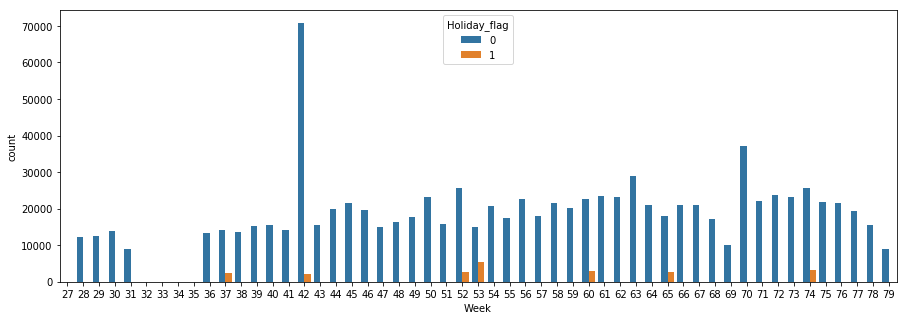

In [111]:
#ploting the holidays in a year
plt.figure(figsize=(15,5))
sns.countplot(x='Week',hue='Holiday_flag',data=orders)

More Orders has been ordered during Week 42 and no orders in between Week 32 to Week 35

<Figure size 1080x360 with 0 Axes>

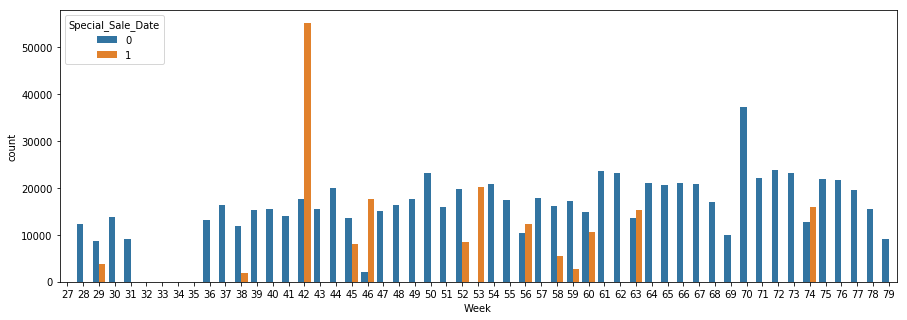

In [112]:
#ploting the special sales day
plt.figure(figsize=(15,5))
sns.countplot(x='Week',hue='Special_Sale_Date',data=orders)

#### In Week 42 where More orders has been observed, big-ticket promotions sale was going on;One more thing observed here that In Week 42,Week 46,Week 56, Week 63, Week 74 Sales are more on the dates Special Sale conducted

<Figure size 1080x360 with 0 Axes>

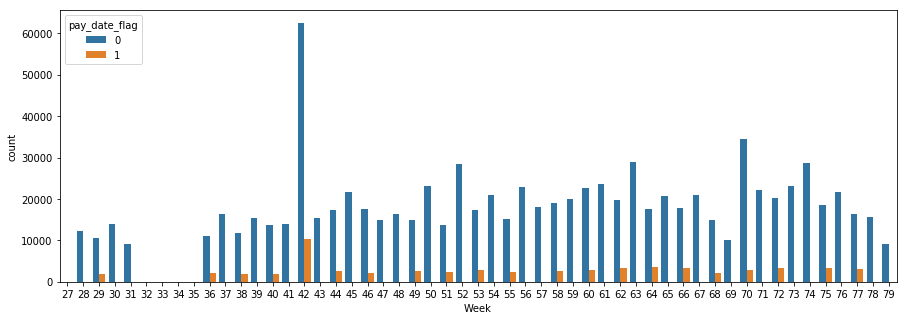

In [113]:
#ploting the pay day
plt.figure(figsize=(15,5))
sns.countplot(x='Week',hue='pay_date_flag',data=orders)

<Figure size 1080x360 with 0 Axes>

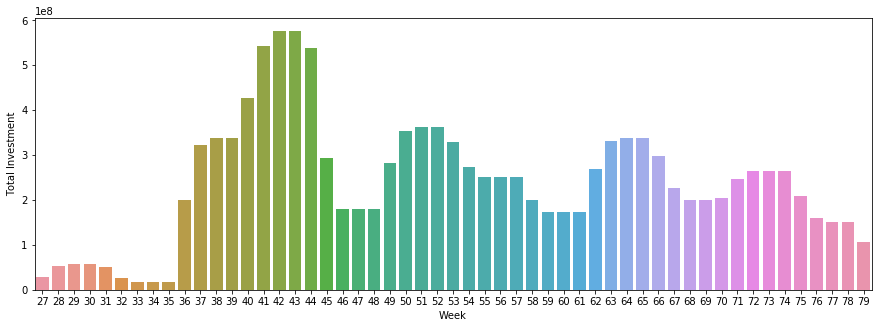

In [114]:
# total investment per week
plt.figure(figsize=(15,5))
sns.barplot(x='Week',y='Total Investment',data=Weekly_mediainvestment)

#### From 35 to Week 44 More Spends on Ads for  big-ticket promotions sale ;One more thing observed here that from Week 49 to Week 53, From Week 62 to Week 65 also Ad spends are more during the special Sales

<Figure size 1080x360 with 0 Axes>

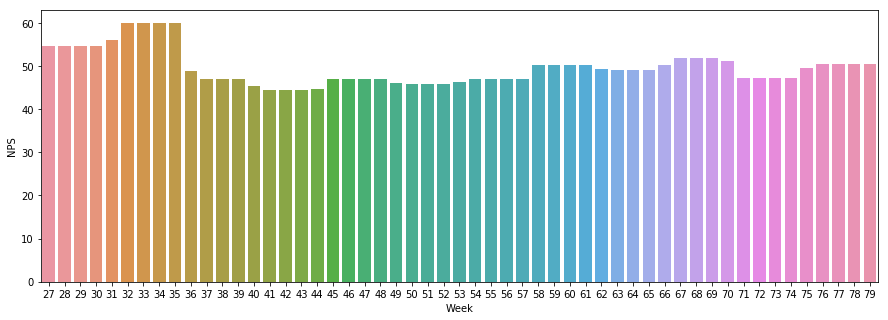

In [115]:
# nps per week
plt.figure(figsize=(15,5))
sns.barplot(x='Week',y='NPS',data=Weekly_nps_stock)

In [116]:
print(Weekly_nps_stock['NPS'].mean())

49.60299000005125


#### Maximum NPS Observed during the Weeks of 32 to 35 60% and Over all Average is 49.6% Maximum Increase of 3.85% in Week 32,Drastic drop has been observed from Week 35 to Week 36 of 11.2%

In [117]:
Weekly_nps_stock['delata_nps']=Weekly_nps_stock['NPS']-Weekly_nps_stock['NPS'].shift(1)

In [118]:
Weekly_nps_stock.loc[9:9]

,Week,NPS,Stock_Index,delata_nps
9,36,48.79,"1,116.00",-11.20


<Figure size 1080x360 with 0 Axes>

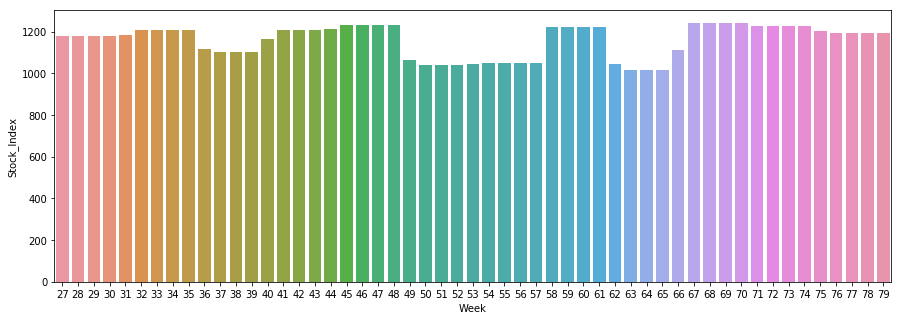

In [119]:
#weekly stock index
plt.figure(figsize=(15,5))
sns.barplot(x='Week',y='Stock_Index',data=Weekly_nps_stock)

#### StocK_Index of Electrokart is Maximum during Week 67 to Week 70 showing 1242 per share, Strong decline observed in Week 62 of 177.42 Units and in Week 49 of 167 Units and  Increase observed  in Week 58 of 170 units and 129.71 Units in Week 67

In [120]:
# delta_stock
Weekly_nps_stock['delta_stock']=Weekly_nps_stock['Stock_Index']-Weekly_nps_stock['Stock_Index'].shift(1)
Weekly_nps_stock.sort_values('delta_stock',ascending=False).head(2)

,Week,NPS,Stock_Index,delata_nps,delta_stock
31,58,50.33,"1,222.00",3.23,170.00
40,67,51.83,"1,242.00",1.60,129.71


In [121]:
Weekly_nps_stock.sort_values('delta_stock',ascending=True).head(2)

,Week,NPS,Stock_Index,delata_nps,delta_stock
35,62,49.21,"1,044.57",-1.12,-177.43
22,49,45.97,"1,065.86",-1.03,-167.14


## Impact of Advertising on Revenue

### Camaccessories

#### Current Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

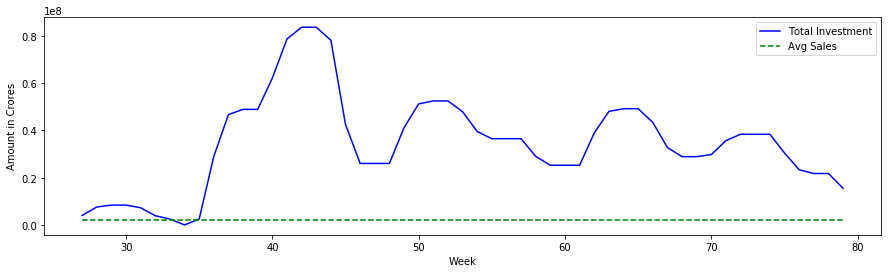

In [122]:
#Total investment vs week checking the current effect
plt.figure(figsize=(15,4))
y_mean = [np.mean(camaccess['gmv'])]*len(camaccess['Week'])
plt.plot(camaccess['Week'],camaccess['Total Investment'],'b')
plt.plot(camaccess['Week'],y_mean,label='Avg Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

###### More Advertising Investments Observed during the Special Sales and during Holidays

#### Carry Over Affect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

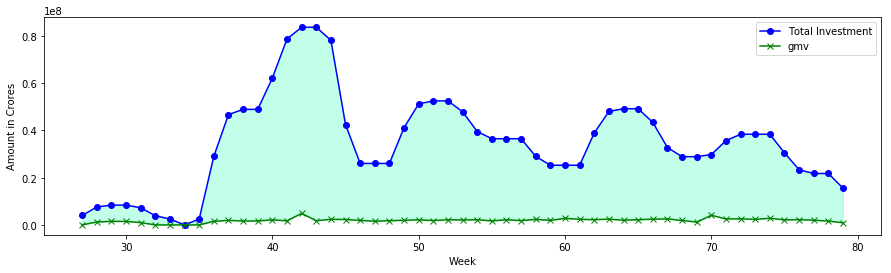

In [123]:
plt.figure(figsize=(15,4))
plt.plot(camaccess['Week'],camaccess['Total Investment'],'b',marker='o')
plt.plot(camaccess['Week'],camaccess['gmv'],'g',marker='x')
plt.fill_between(camaccess['Week'], camaccess['Total Investment'], camaccess['gmv'], color='#33ffb5', alpha='0.3')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### It has been Observed Advertising impacts sales in the following weeks

#### Dynamic Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

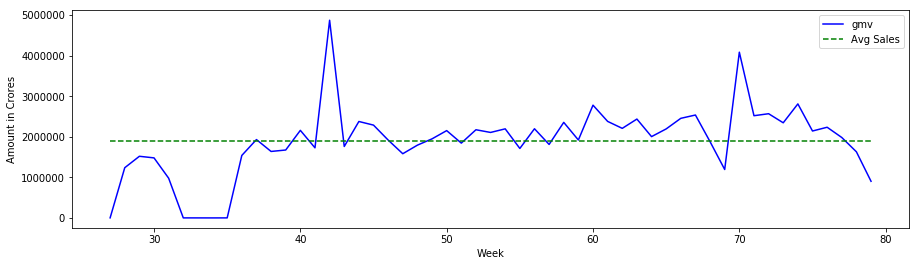

In [124]:
#Total investment vs week checking the Dynamic effect
plt.figure(figsize=(15,4))
y_mean = [np.mean(camaccess['gmv'])]*len(camaccess['Week'])
plt.plot(camaccess['Week'],camaccess['gmv'],color='b')
plt.plot(camaccess['Week'],y_mean,label='Avg Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### Shape Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Advertising')

Text(0, 0.5, 'Sales')

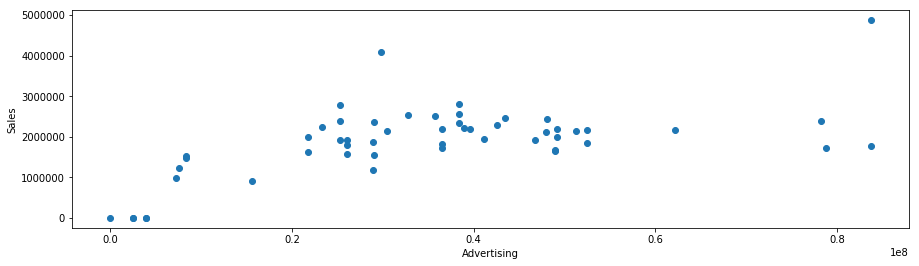

In [125]:
#Total sales vs advertising checking the shape effect
plt.figure(figsize=(15,4))
plt.scatter(camaccess['Total Investment'],camaccess['gmv'])
plt.xlabel('Advertising')
plt.ylabel('Sales')

#### Shape is irregular

#### Media Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

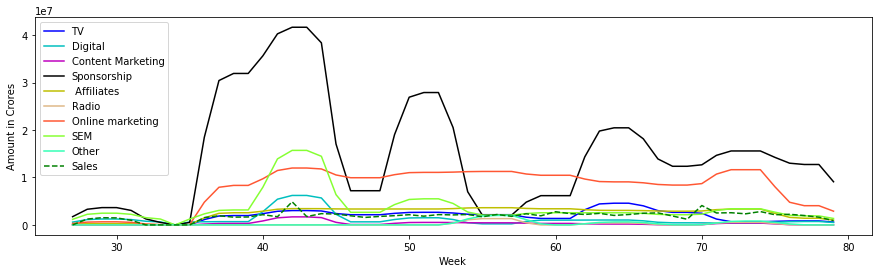

In [126]:
#Total investment vs week checking the media effect
plt.figure(figsize=(15,4))
plt.plot(camaccess['Week'],camaccess['TV'],'b')
plt.plot(camaccess['Week'],camaccess['Digital'],'c')
plt.plot(camaccess['Week'],camaccess['Content Marketing'],'m')
plt.plot(camaccess['Week'],camaccess['Sponsorship'],'k')
plt.plot(camaccess['Week'],camaccess[' Affiliates'],'y')
plt.plot(camaccess['Week'],camaccess['Radio'],color='burlywood')
plt.plot(camaccess['Week'],camaccess['Online marketing'],color='#ff5733')
plt.plot(camaccess['Week'],camaccess['SEM'],color='#86ff33')
plt.plot(camaccess['Week'],camaccess['Other'],color='#33ffB5')
plt.plot(camaccess['Week'],camaccess['gmv'],label='Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### More Advertising Investments observed with Sponsorships and Online Marketing During Special Sales and Holidays and Very less spends observed in Radio and Others

### Game Accessories

#### Current Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

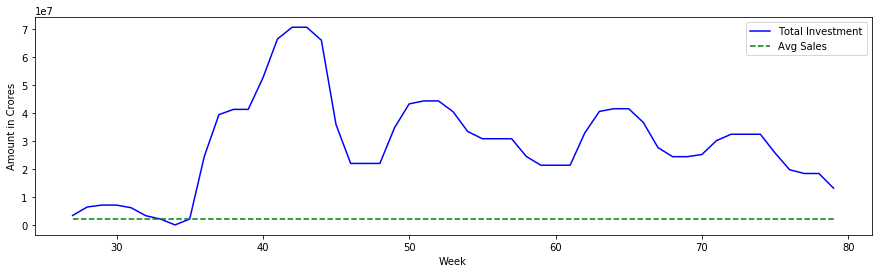

In [127]:
#Total investment vs week checking the current effect
plt.figure(figsize=(15,4))
y_mean = [np.mean(gameaccess['gmv'])]*len(gameaccess['Week'])
plt.plot(gameaccess['Week'],gameaccess['Total Investment'],'b')
plt.plot(gameaccess['Week'],y_mean,label='Avg Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

###### More Advertising Investments Observed during the Special Sales and during Holidays

#### Carry Over Affect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

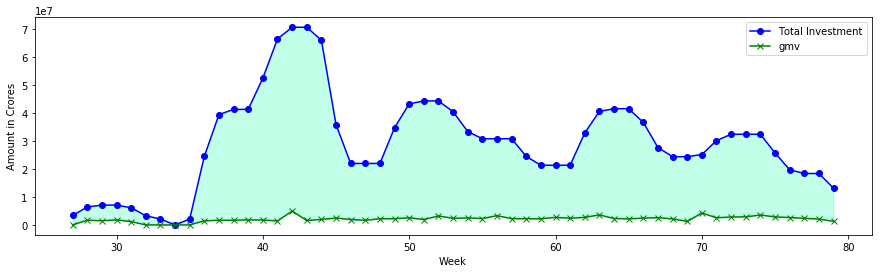

In [128]:
#Total investment vs week checking the carryover effect
plt.figure(figsize=(15,4))
plt.plot(gameaccess['Week'],gameaccess['Total Investment'],'b',marker='o')
plt.plot(gameaccess['Week'],gameaccess['gmv'],'g',marker='x')
plt.fill_between(gameaccess['Week'], gameaccess['Total Investment'], gameaccess['gmv'], color='#33ffb5', alpha='0.3')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### It has been Observed Advertising impacts sales in the following weeks

#### Dynamic Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

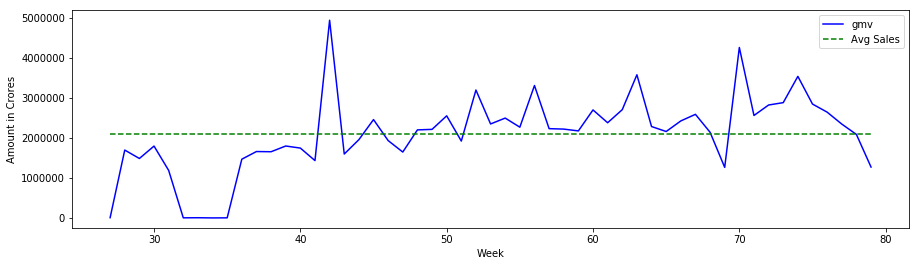

In [129]:
#Total investment vs week checking the Dynamic effect
plt.figure(figsize=(15,4))
y_mean = [np.mean(gameaccess['gmv'])]*len(gameaccess['Week'])
plt.plot(gameaccess['Week'],gameaccess['gmv'],'b')
plt.plot(gameaccess['Week'],y_mean,label='Avg Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### Shape Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Advertising')

Text(0, 0.5, 'Sales')

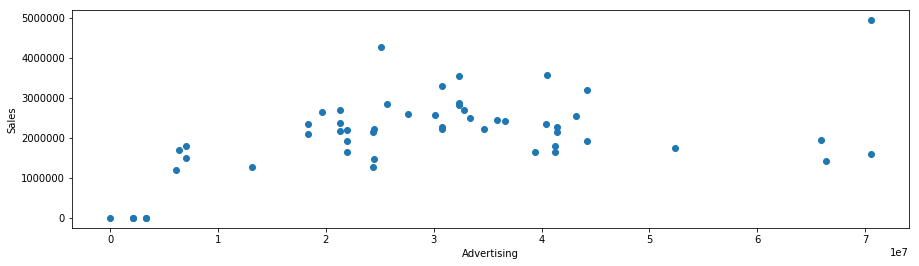

In [130]:
#Total investment vs week checking the shapeing effect
plt.figure(figsize=(15,4))
plt.scatter(gameaccess['Total Investment'],gameaccess['gmv'])
plt.xlabel('Advertising')
plt.ylabel('Sales')

#### Shape is irregular

#### Media Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

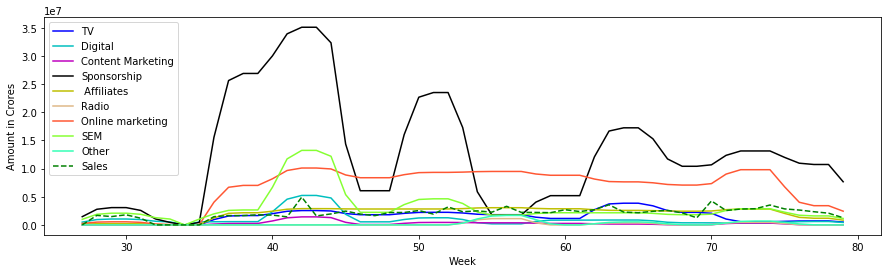

In [131]:
#Total investment vs week checking the media effect
plt.figure(figsize=(15,4))

plt.plot(gameaccess['Week'],gameaccess['TV'],'b')
plt.plot(gameaccess['Week'],gameaccess['Digital'],'c')
plt.plot(gameaccess['Week'],gameaccess['Content Marketing'],'m')
plt.plot(gameaccess['Week'],gameaccess['Sponsorship'],'k')
plt.plot(gameaccess['Week'],gameaccess[' Affiliates'],'y')
plt.plot(gameaccess['Week'],gameaccess['Radio'],color='burlywood')
plt.plot(gameaccess['Week'],gameaccess['Online marketing'],color='#ff5733')
plt.plot(gameaccess['Week'],gameaccess['SEM'],color='#86ff33')
plt.plot(gameaccess['Week'],gameaccess['Other'],color='#33ffB5')
plt.plot(gameaccess['Week'],gameaccess['gmv'],label='Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### More Advertising Investments observed with Sponsorships,SEM and Online Marketing During Special Sales and Holidays and Very less spends observed in Radio

### Homeaudio

#### Current Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

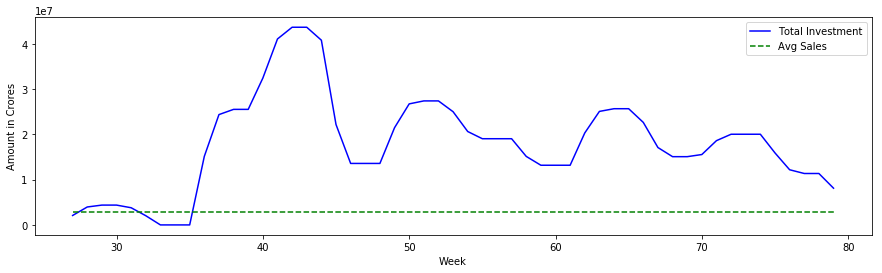

In [132]:
#Total investment vs week checking the current effect
plt.figure(figsize=(15,4))
y_mean = [np.mean(homeaudio['gmv'])]*len(homeaudio['Week'])
plt.plot(homeaudio['Week'],homeaudio['Total Investment'],'b')
plt.plot(homeaudio['Week'],y_mean,label='Avg Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

###### More Advertising Investments Observed during the Special Sales and during Holidays

#### Carry Over Affect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

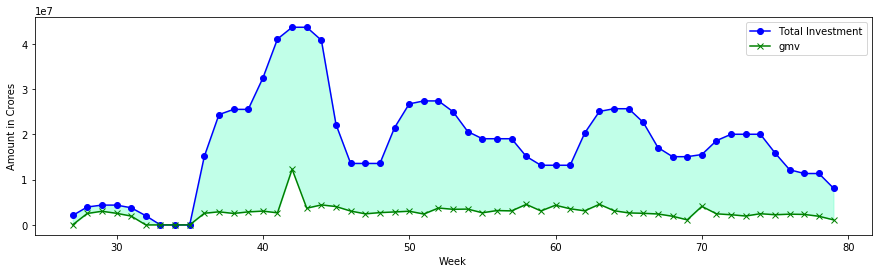

In [133]:
#Total investment vs week checking the Dynamic effect
plt.figure(figsize=(15,4))
plt.plot(homeaudio['Week'],homeaudio['Total Investment'],'b',marker='o')
plt.plot(homeaudio['Week'],homeaudio['gmv'],'g',marker='x')
plt.fill_between(homeaudio['Week'], homeaudio['Total Investment'], homeaudio['gmv'], color='#33ffb5', alpha='0.3')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### It has been Observed Advertising impacts sales in the following weeks

#### Dynamic Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

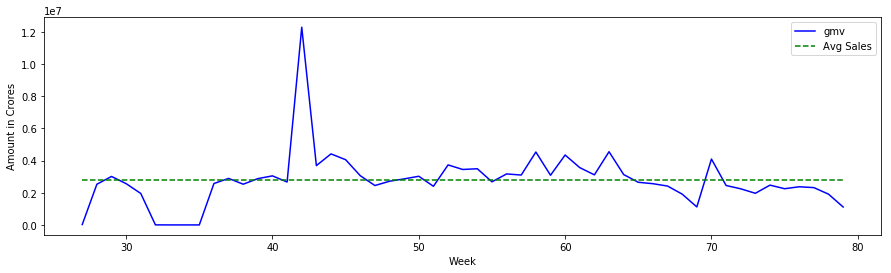

In [134]:
#Total investment vs week checking the Dynamic effect
plt.figure(figsize=(15,4))
y_mean = [np.mean(homeaudio['gmv'])]*len(homeaudio['Week'])
plt.plot(homeaudio['Week'],homeaudio['gmv'],'b')
plt.plot(homeaudio['Week'],y_mean,label='Avg Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### Shape Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Advertising')

Text(0, 0.5, 'Sales')

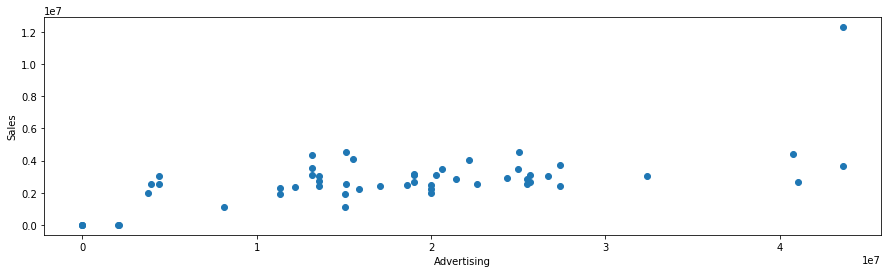

In [135]:
#Total investment vs week checking the shape effect
plt.figure(figsize=(15,4))
plt.scatter(homeaudio['Total Investment'],homeaudio['gmv'])
plt.xlabel('Advertising')
plt.ylabel('Sales')

#### Shape is irregular

#### Media Effect

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount in Crores')

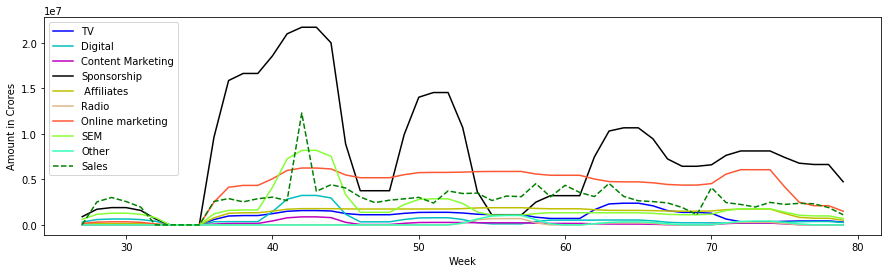

In [136]:
#Total investment vs week checking the media effect
plt.figure(figsize=(15,4))

plt.plot(homeaudio['Week'],homeaudio['TV'],'b')
plt.plot(homeaudio['Week'],homeaudio['Digital'],'c')
plt.plot(homeaudio['Week'],homeaudio['Content Marketing'],'m')
plt.plot(homeaudio['Week'],homeaudio['Sponsorship'],'k')
plt.plot(homeaudio['Week'],homeaudio[' Affiliates'],'y')
plt.plot(homeaudio['Week'],homeaudio['Radio'],color='burlywood')
plt.plot(homeaudio['Week'],homeaudio['Online marketing'],color='#ff5733')
plt.plot(homeaudio['Week'],homeaudio['SEM'],color='#86ff33')
plt.plot(homeaudio['Week'],homeaudio['Other'],color='#33ffB5')
plt.plot(homeaudio['Week'],homeaudio['gmv'],label='Sales',linestyle='--',color='g')
plt.xlabel('Week')
plt.ylabel('Amount in Crores')
plt.legend(loc='best')

#### More Advertising Investments observed with Sponsorships,SEM and Online Marketing During Special Sales and Holidays and Very less spends observed in Radio it has been observed that few weeks Sales value is more than the Advertising Investments

## Correlation 

<Figure size 1440x1080 with 0 Axes>

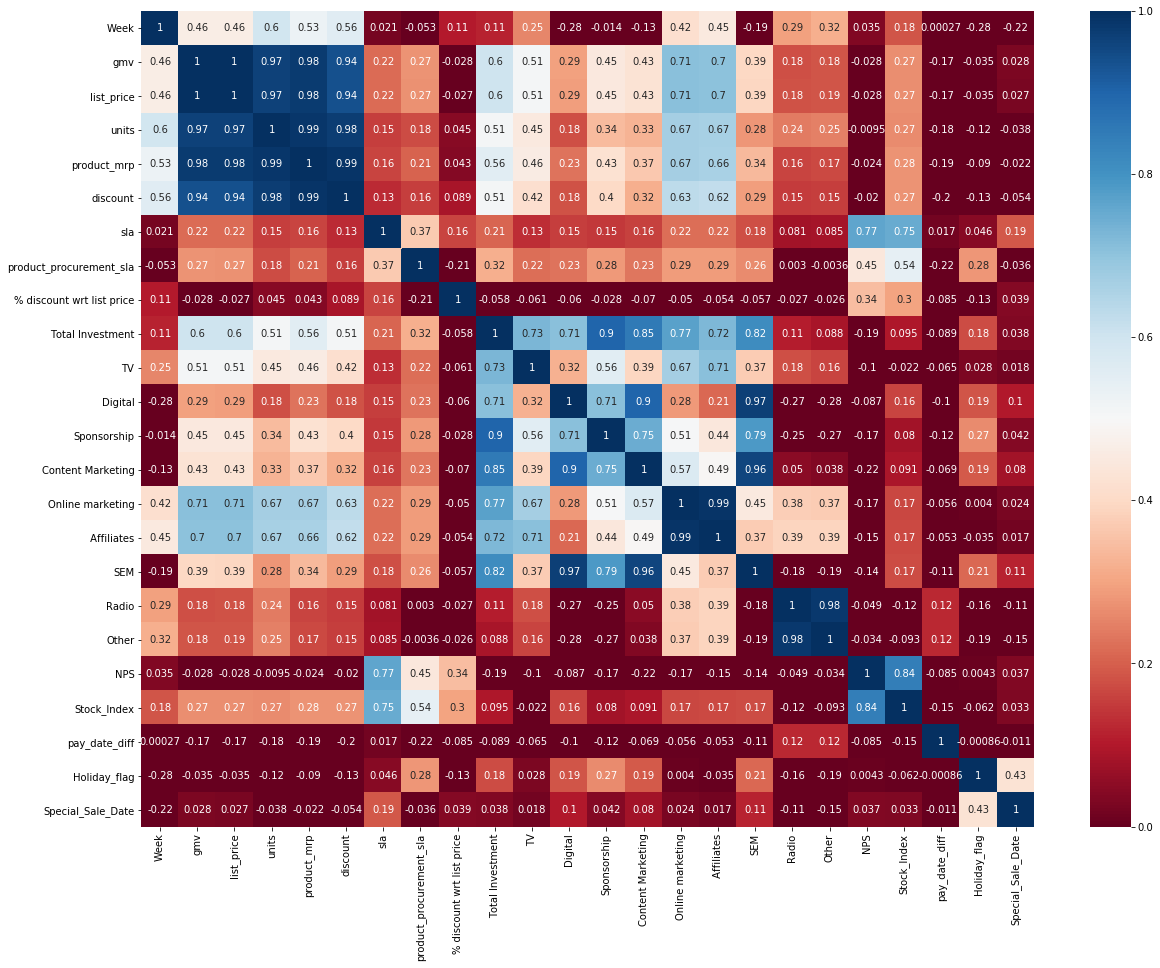

In [137]:
#checing the correlation
plt.figure(figsize=(20,15))
sns.heatmap(camaccess.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

#### Since List_Price is derived from gmv and units it is Exhibiting high correlation;Total Investment is sum of all other Investments it is also showing the High Correlation;NPS and stock Index also showing mutually high correlation

<Figure size 1440x1080 with 0 Axes>

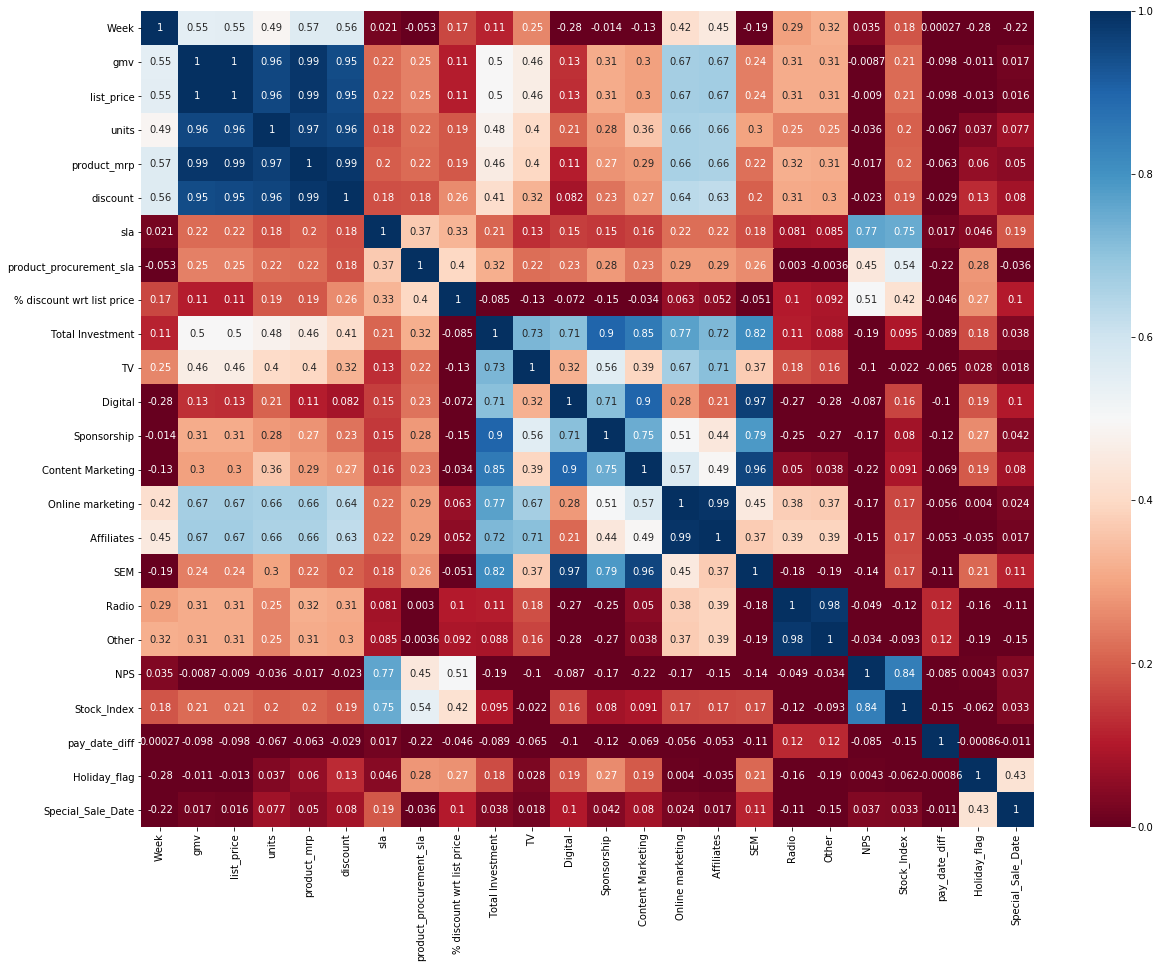

In [138]:
plt.figure(figsize=(20,15))
sns.heatmap(gameaccess.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

#### Similar observations as Camaccess data

<Figure size 1440x1080 with 0 Axes>

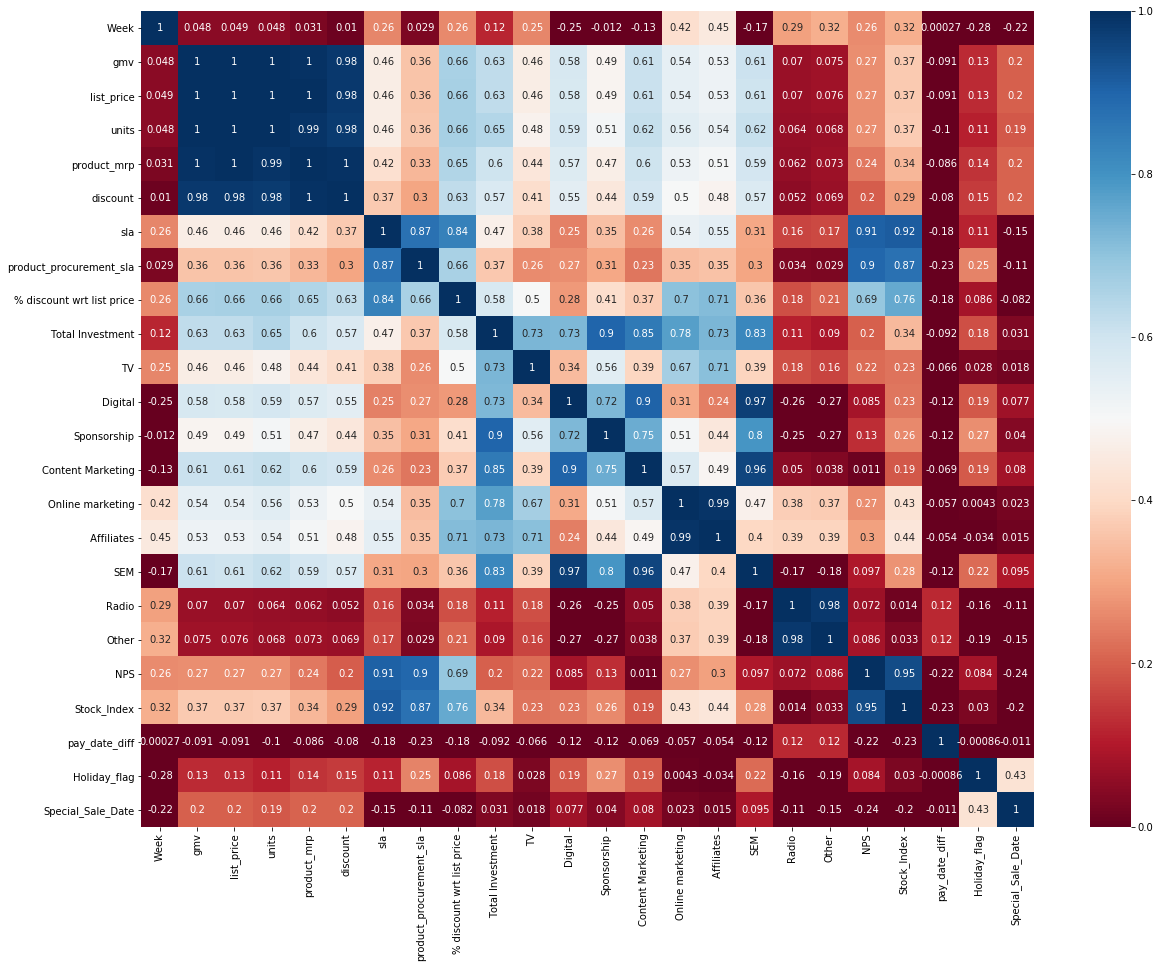

In [139]:
plt.figure(figsize=(20,15))
sns.heatmap(homeaudio.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

#### Similar Observations as Camaccess data for better better modelHigh correlating Variables will be removed

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

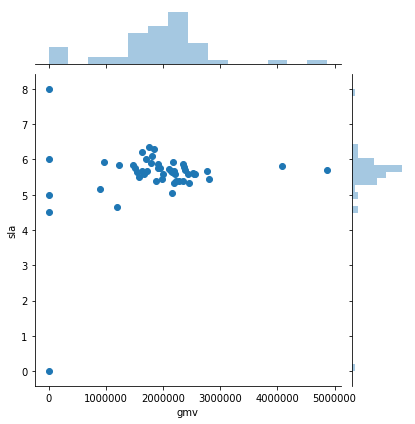

In [140]:
#camaccess data correlation
plt.figure(figsize=(20,5))
sns.jointplot(x='gmv',y='sla',data=camaccess)

#### More SLA observed is 10 Days and more sales observed for SLA from 4 to 8 Days

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

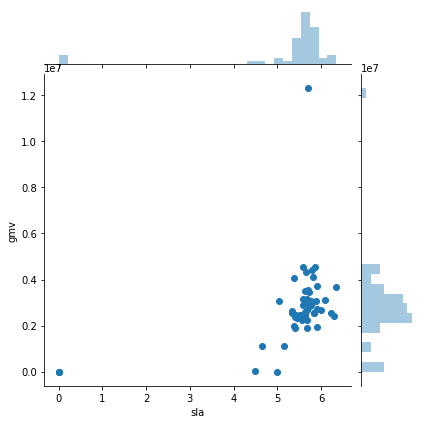

In [141]:
# gmv vs sla
plt.figure(figsize=(20,5))
sns.jointplot(x='sla',y='gmv',data=homeaudio)

#### More SLA observed is 7 Days and more sales observed for SLA from 5 to 7 Days

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

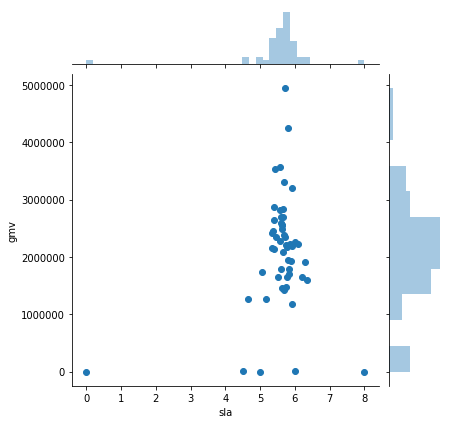

In [142]:
# gmv vs sla
plt.figure(figsize=(20,5))
sns.jointplot(x='sla',y='gmv',data=gameaccess)

### More SLA observed is 10 Days and more sales observed for SLA from 5 to 7 Days

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

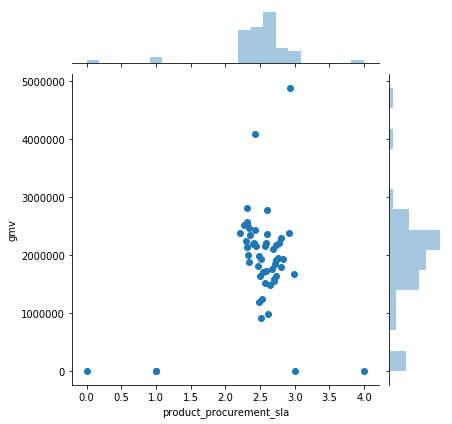

In [143]:
# gmv vs product_procurement_sla
plt.figure(figsize=(20,5))
sns.jointplot(x='product_procurement_sla',y='gmv',data=camaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

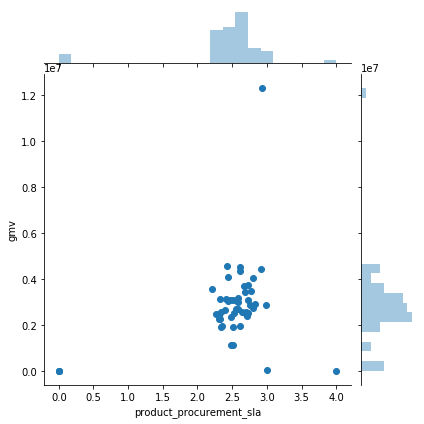

In [144]:
# gmv vs product_procurement_sla
plt.figure(figsize=(20,5))
sns.jointplot(x='product_procurement_sla',y='gmv',data=homeaudio)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

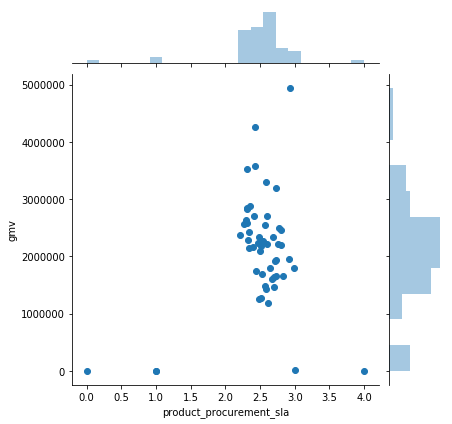

In [145]:
# gmv vs product_procurement_sla
plt.figure(figsize=(20,5))
sns.jointplot(x='product_procurement_sla',y='gmv',data=gameaccess)

#### For all product categories more sales observed for product procurement Sla of 2.5 to 3 days

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

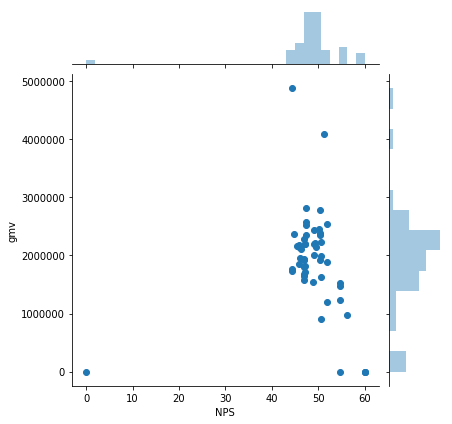

In [146]:
# gmv vs nps
plt.figure(figsize=(20,5))
sns.jointplot(x='NPS',y='gmv',data=camaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

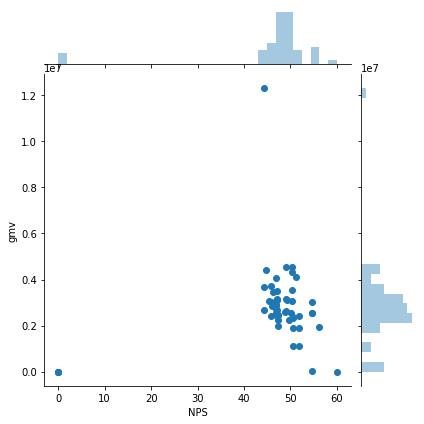

In [147]:
# gmv vs nps
plt.figure(figsize=(20,5))
sns.jointplot(x='NPS',y='gmv',data=homeaudio)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

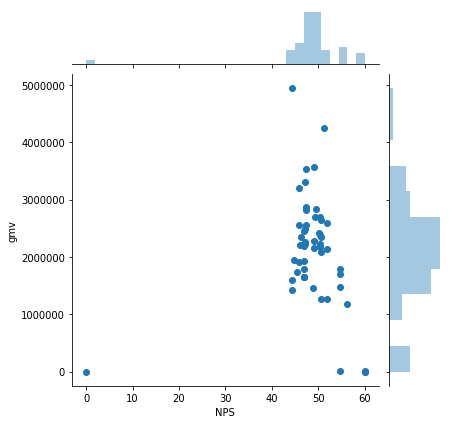

In [148]:
# gmv vs nps
plt.figure(figsize=(20,5))
sns.jointplot(x='NPS',y='gmv',data=gameaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

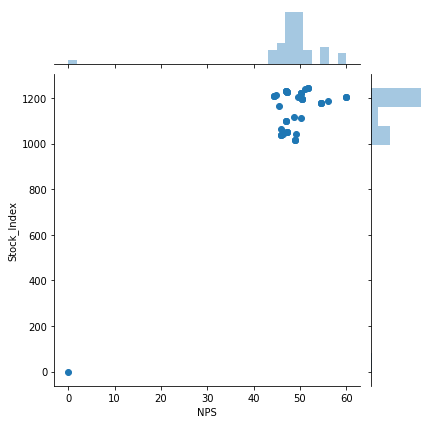

In [149]:
# gmv vs Stock_Index
plt.figure(figsize=(20,5))
sns.jointplot(x='NPS',y='Stock_Index',data=camaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

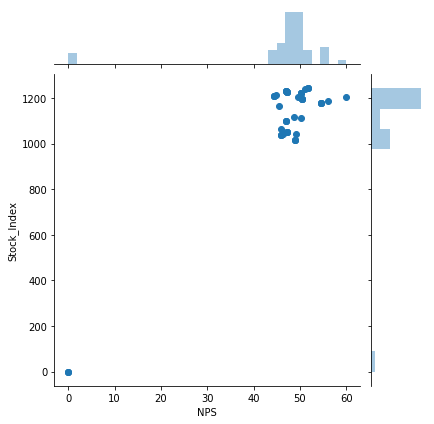

In [150]:
# gmv vs Stock_Index
plt.figure(figsize=(20,5))
sns.jointplot(x='NPS',y='Stock_Index',data=homeaudio)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

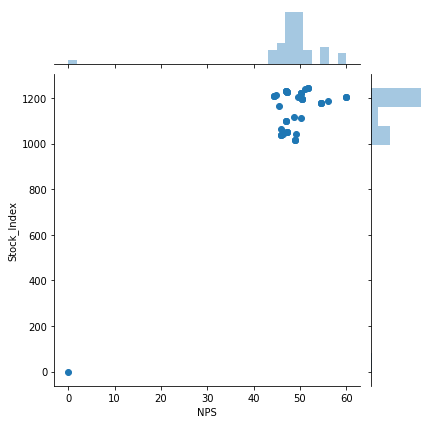

In [151]:
# gmv vs Stock_Index
plt.figure(figsize=(20,5))
sns.jointplot(x='NPS',y='Stock_Index',data=gameaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

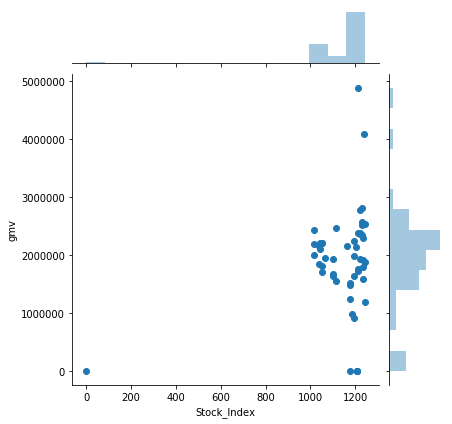

In [152]:
# gmv vs Stock_Index
plt.figure(figsize=(20,5))
sns.jointplot(x='Stock_Index',y='gmv',data=camaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

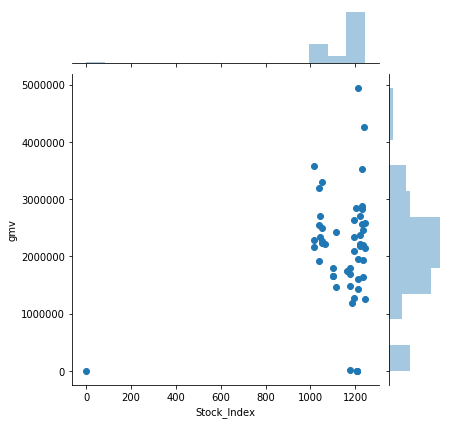

In [153]:
# gmv vs Stock_Index
plt.figure(figsize=(20,5))
sns.jointplot(x='Stock_Index',y='gmv',data=gameaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

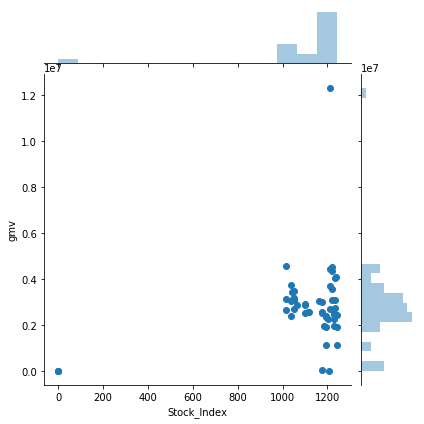

In [154]:
# gmv vs Stock_Index
plt.figure(figsize=(20,5))
sns.jointplot(x='Stock_Index',y='gmv',data=homeaudio)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

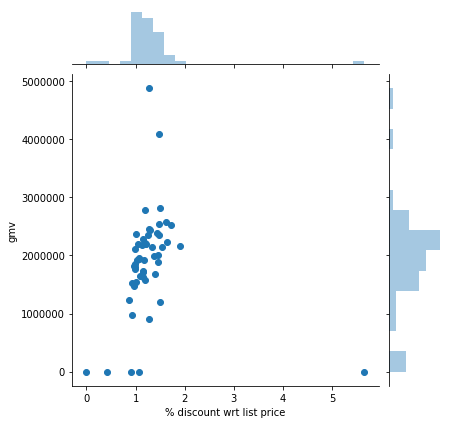

In [155]:
# gmv vs % discount wrt list price
plt.figure(figsize=(20,5))
sns.jointplot(x='% discount wrt list price',y='gmv',data=camaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

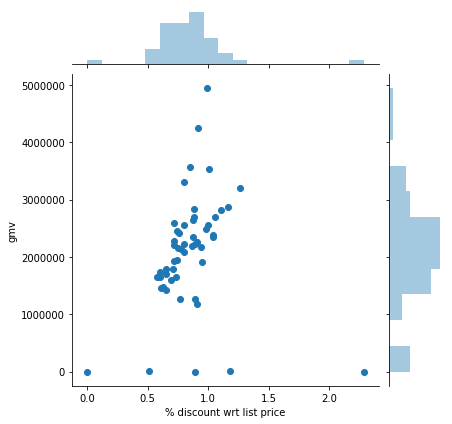

In [156]:
# gmv vs % discount wrt list price
plt.figure(figsize=(20,5))
sns.jointplot(x='% discount wrt list price',y='gmv',data=gameaccess)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

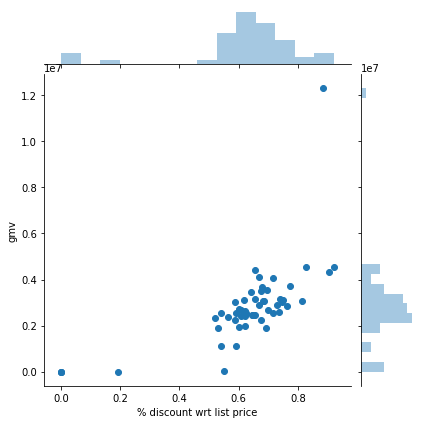

In [157]:
# gmv vs % discount wrt list price
plt.figure(figsize=(20,5))
sns.jointplot(x='% discount wrt list price',y='gmv',data=homeaudio)

<Figure size 720x360 with 0 Axes>

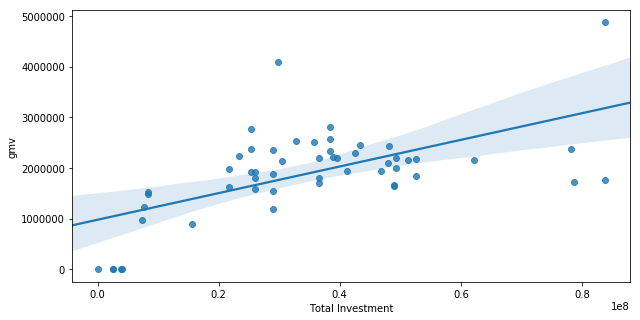

In [158]:
# gmv vs Total Investment
plt.figure(figsize=(10,5))
sns.regplot(x='Total Investment',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

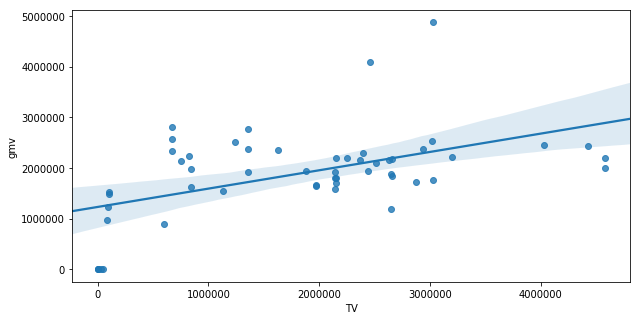

In [159]:
# gmv vs TV
plt.figure(figsize=(10,5))
sns.regplot(x='TV',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

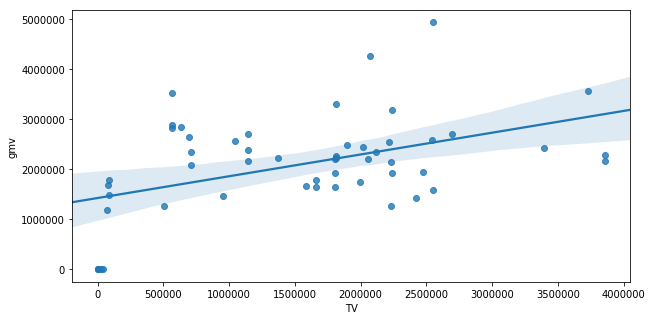

In [160]:
# gmv vs TV
plt.figure(figsize=(10,5))
sns.regplot(x='TV',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

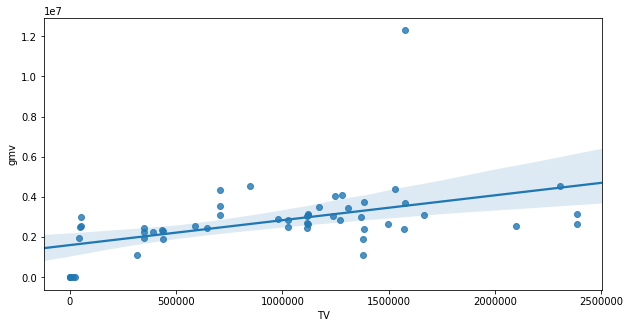

In [161]:
# gmv vs TV
plt.figure(figsize=(10,5))
sns.regplot(x='TV',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

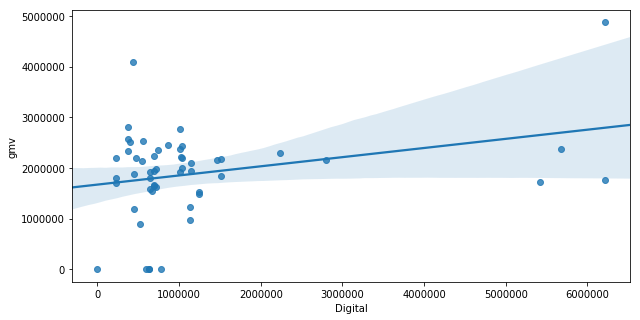

In [162]:
# gmv vs Digital
plt.figure(figsize=(10,5))
sns.regplot(x='Digital',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

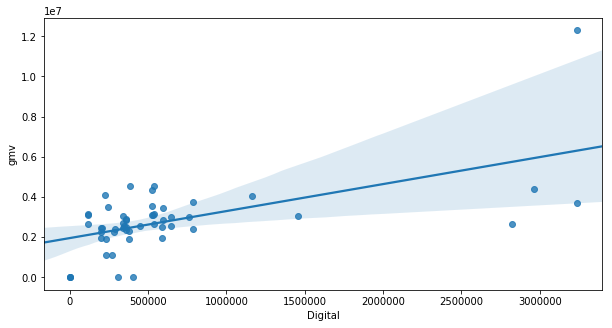

In [163]:
# gmv vs Digital
plt.figure(figsize=(10,5))
sns.regplot(x='Digital',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

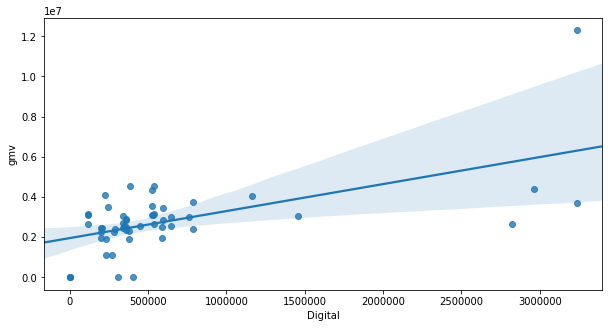

In [164]:
# gmv vs Digital
plt.figure(figsize=(10,5))
sns.regplot(x='Digital',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

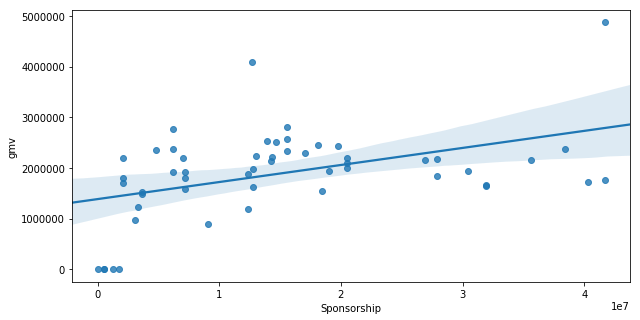

In [165]:
# gmv vs Sponsorship
plt.figure(figsize=(10,5))
sns.regplot(x='Sponsorship',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

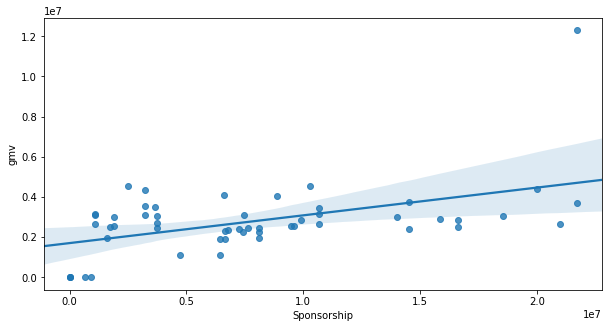

In [166]:
# gmv vs Sponsorship
plt.figure(figsize=(10,5))
sns.regplot(x='Sponsorship',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

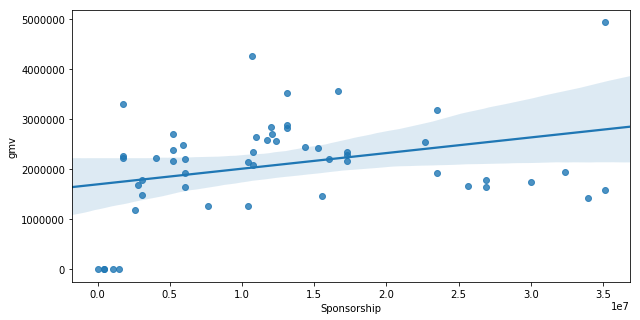

In [167]:
# gmv vs Sponsorship
plt.figure(figsize=(10,5))
sns.regplot(x='Sponsorship',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

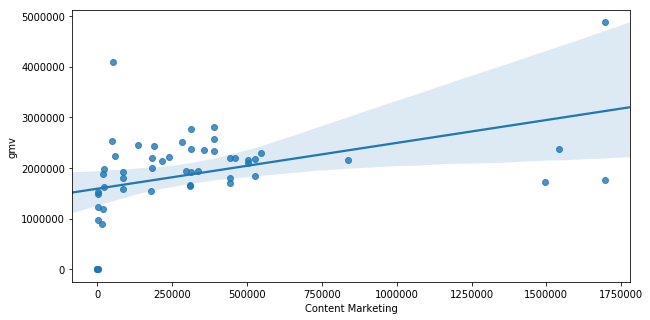

In [168]:
# gmv vs Content Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Content Marketing',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

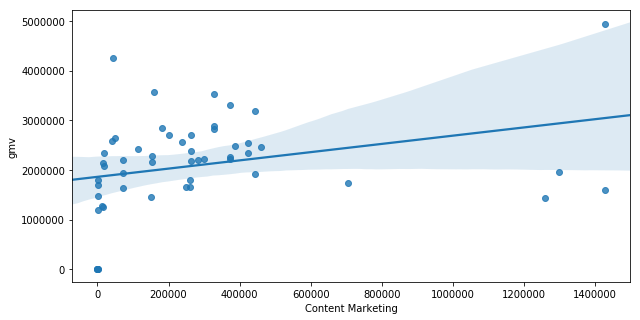

In [169]:
# gmv vs Content Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Content Marketing',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

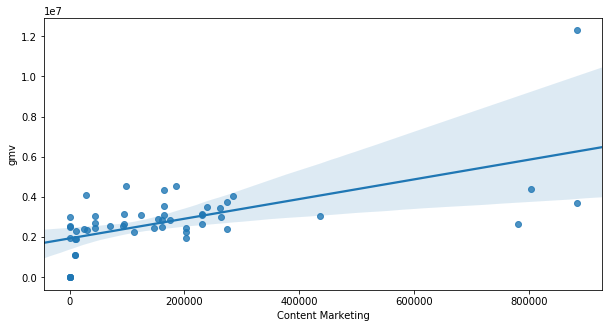

In [170]:
# gmv vs Content Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Content Marketing',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

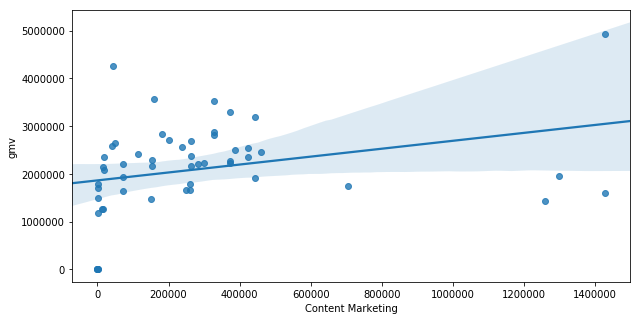

In [171]:
# gmv vs Content Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Content Marketing',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

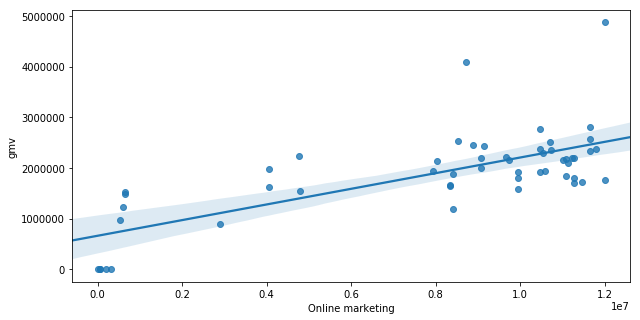

In [172]:
# gmv vs Online Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Online marketing',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

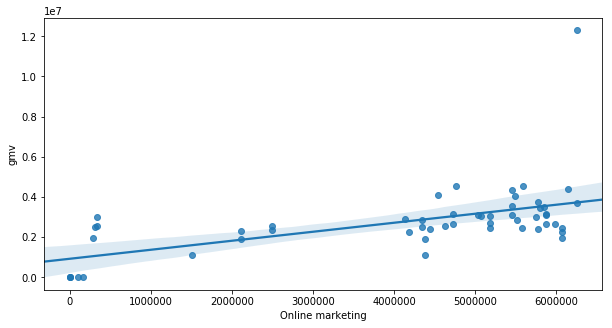

In [173]:
# gmv vs Online Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Online marketing',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

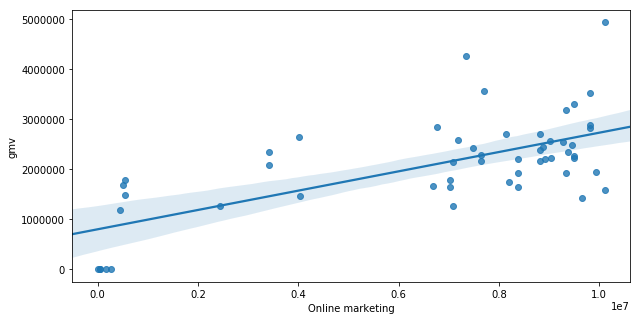

In [174]:
# gmv vs Online Marketing
plt.figure(figsize=(10,5))
sns.regplot(x='Online marketing',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

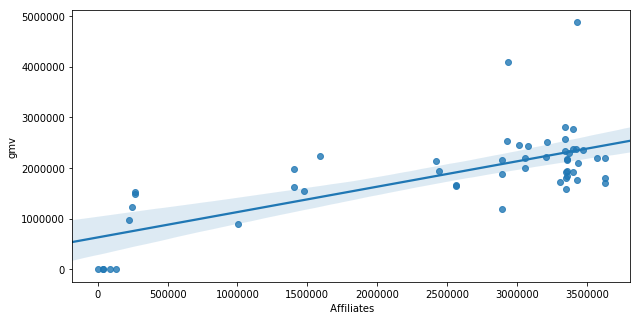

In [175]:
# gmv vs Affiliates
plt.figure(figsize=(10,5))
sns.regplot(x=' Affiliates',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

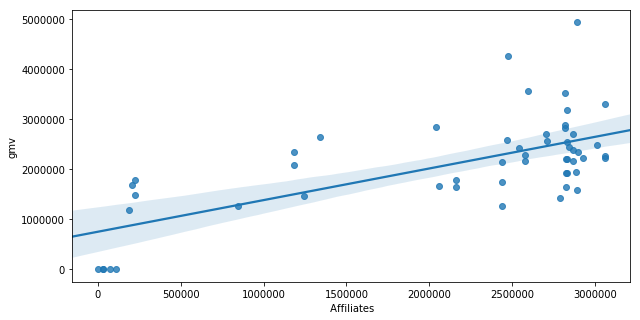

In [176]:
# gmv vs Affiliates
plt.figure(figsize=(10,5))
sns.regplot(x=' Affiliates',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

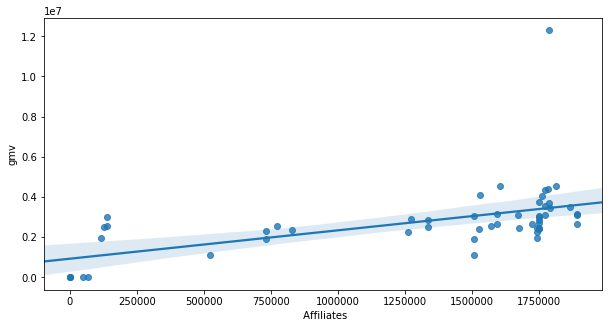

In [177]:
# gmv vs Affiliates
plt.figure(figsize=(10,5))
sns.regplot(x=' Affiliates',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

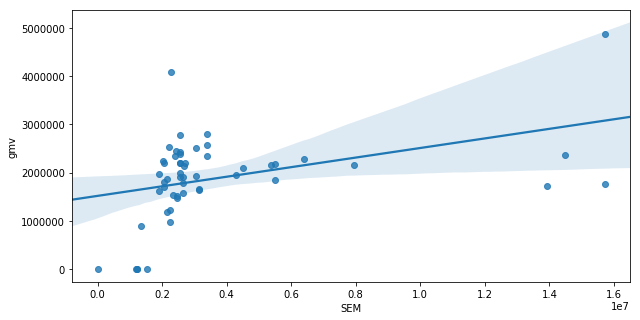

In [178]:
# gmv vs Affiliates
plt.figure(figsize=(10,5))
sns.regplot(x='SEM',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

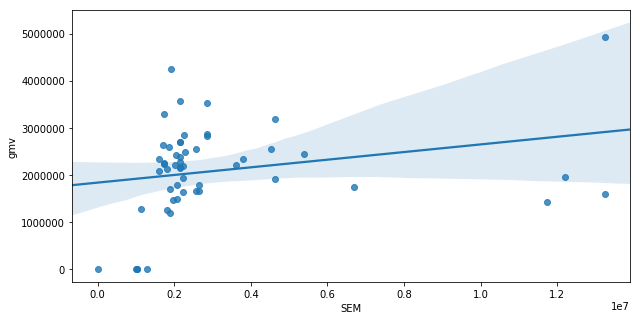

In [179]:
# gmv vs SEM
plt.figure(figsize=(10,5))
sns.regplot(x='SEM',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

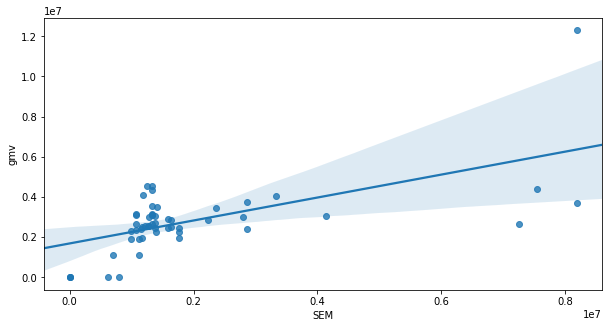

In [180]:
# gmv vs SEM
plt.figure(figsize=(10,5))
sns.regplot(x='SEM',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

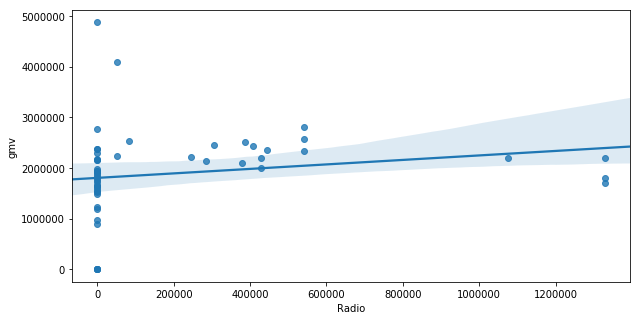

In [181]:
# gmv vs Radio
plt.figure(figsize=(10,5))
sns.regplot(x='Radio',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

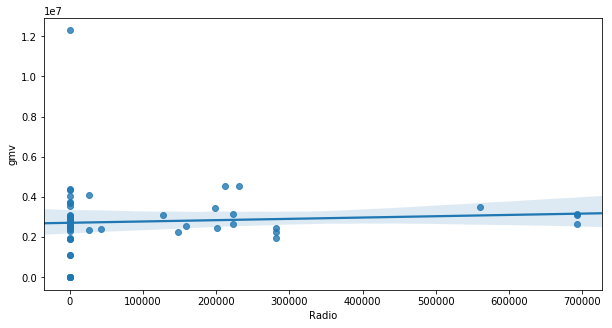

In [182]:
# gmv vs Radio
plt.figure(figsize=(10,5))
sns.regplot(x='Radio',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

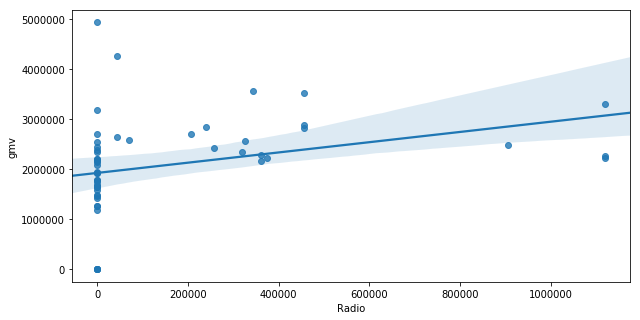

In [183]:
# gmv vs Radio
plt.figure(figsize=(10,5))
sns.regplot(x='Radio',y='gmv',data=gameaccess,order=1)

<Figure size 720x360 with 0 Axes>

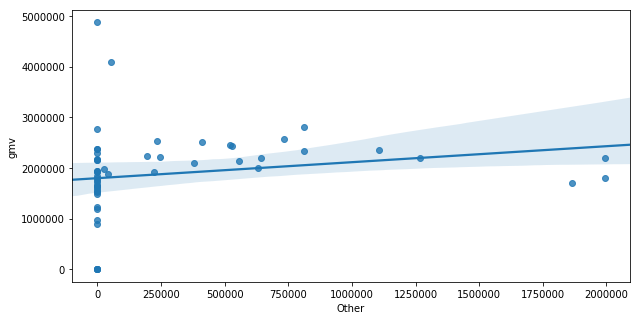

In [184]:
# gmv vs Radio
plt.figure(figsize=(10,5))
sns.regplot(x='Other',y='gmv',data=camaccess,order=1)

<Figure size 720x360 with 0 Axes>

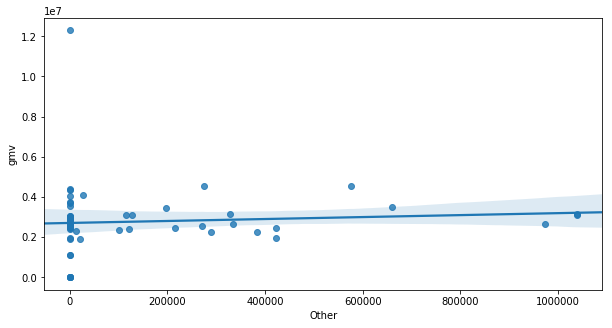

In [185]:
# gmv vs Other
plt.figure(figsize=(10,5))
sns.regplot(x='Other',y='gmv',data=homeaudio,order=1)

<Figure size 720x360 with 0 Axes>

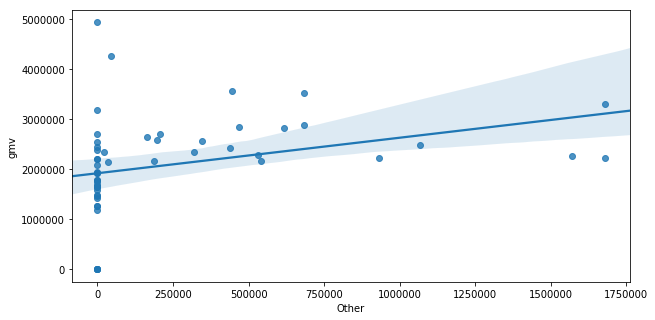

In [186]:
# gmv vs Other
plt.figure(figsize=(10,5))
sns.regplot(x='Other',y='gmv',data=gameaccess,order=1)

In [187]:
# to csv to save files
camaccess.to_csv('camaccess.csv')
homeaudio.to_csv('homeaudio.csv')
gameaccess.to_csv('gameaccess.csv')